In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

We will then read in the data using `pd.read_csv` and then view the data description using the `describe()` method. 

In [65]:
df = pd.read_csv("data/experimental_data/latent_vectors_by_group.csv")
#df = pd.read_csv("data/experimental_data/gratin_results_for_n2_+myoIb_1_trackedPar.csv")

In [66]:
df.describe()

Unnamed: 0            n            L          U_1          U_2  \
count  2985.000000  2985.000000  2985.000000  2985.000000  2985.000000   
mean   1492.000000   182.363819    28.367504    -0.460790    -1.004473   
std     861.839602   105.486367    21.220310     2.496118     4.140225   
min       0.000000     1.000000     7.000000    -7.927718    -9.870786   
25%     746.000000    92.000000    12.000000    -2.157821    -4.850486   
50%    1492.000000   181.000000    21.000000    -0.390594    -0.482877   
75%    2238.000000   273.000000    38.000000     1.462448     2.309093   
max    2984.000000   369.000000    80.000000     6.889447     7.482151   

             alpha            x            y             t   frame  \
count  2985.000000  2985.000000  2985.000000  2.985000e+03  2985.0   
mean      1.019048    18.332774    55.841368  1.000000e-02     1.0   
std       0.304939    10.952121    31.730328  6.246051e-16     0.0   
min       0.360706     0.377637     0.412575  1.000000e-02     1.0   
25%       0.787742     8.225637    27.295586  1.000000e-02     1.0   
50%       1.069455    18.131267    54.318370  1.000000e-02     1.0   
75%       1.255864    28.646301    83.647951  1.000000e-02     1.0   
max       1.831328    36.742365   112.181502  1.000000e-02     1.0   

             log_D            D    est_sigma     n_points     duration  \
count  2985.000000  2985.000000  2985.000000  2985.000000  2985.000000   
mean     -0.570415     1.341954     0.048638    68.563819     0.689461   
std       0.926951     1.734159     0.037772    18.891855     0.188674   
min      -2.864225     0.001367     0.000000     7.000000     0.070000   
25%      -1.239888     0.057559     0.019457    62.000000     0.630000   
50%      -0.967029     0.107888     0.029192    80.000000     0.800000   
75%       0.456469     2.860675     0.080034    80.000000     0.800000   
max       0.917107     8.262411     0.172432    80.000000     0.830000   

         unit      traj_ID  
count  2985.0  2985.000000  
mean      0.0   175.951759  
std       0.0   102.280431  
min       0.0     0.000000  
25%       0.0    89.000000  
50%       0.0   176.000000  
75%       0.0   263.000000  
max       0.0   358.000000

As it is quite a big table, we can view the columns by calling upon `df.columns`.

In [67]:
df.columns

Index(['Unnamed: 0', 'n', 'L', 'U_1', 'U_2', 'alpha', 'best_model', 'x', 'y',
       't', 'frame', 'log_D', 'D', 'est_sigma', 'n_points', 'duration', 'file',
       'unit', 'traj_ID'],
      dtype='object')

to take a copy of the dataframe with only the useful/desired columns

In [68]:
workingdf = df[["n", "L", "U_1", "U_2", "alpha", "best_model", "x", "y","log_D", "D","n_points","traj_ID"]].copy()

In [69]:
workingdf

n   L       U_1       U_2     alpha best_model          x           y  \
0       1   7 -2.036862 -4.744758  1.051360        fBM   0.585975   39.901832   
1     205   7 -2.683937  5.414019  0.473904       CTRW  20.386560   49.647289   
2     182   7  1.494249  0.580148  1.202388         LW  18.308408   61.321629   
3     183   7 -3.031612  4.924722  0.462959       CTRW  18.390043    8.299862   
4       2   7  1.539879  0.752762  1.165205         LW   0.591945   53.760382   
...   ...  ..       ...       ...       ...        ...        ...         ...   
2980  113  80  2.885058  5.450785  0.595366       CTRW  10.340621  103.355619   
2981   36  80 -2.433742 -5.010599  1.046734         OU   3.099012   45.439128   
2982   37  80  3.058303 -2.885796  1.298383         LW   3.193811   21.148154   
2983   51  80 -0.379753 -4.612813  1.091443        fBM   4.506641    5.335698   
2984   55  80 -0.976015 -4.758519  1.125927        fBM   4.749136   67.215980   

         log_D         D  n_points  traj_ID  
0    -0.405578  0.393026        80        0  
1    -2.598468  0.002521        80      197  
2    -1.095474  0.080265        80      177  
3    -2.616710  0.002417        80      178  
4    -1.067712  0.085563        80        1  
...        ...       ...       ...      ...  
2980 -0.747707  0.178769        80      109  
2981  0.562565  3.652287        80       34  
2982 -1.166700  0.068124        80       35  
2983  0.575173  3.759875        80       49  
2984  0.405098  2.541547        80       53  

[2985 rows x 12 columns]

## Column Remapping / Renaming

Create a dictionnary to make plotting easier later on

In [70]:
simple_model_numbers = {'CTRW': 1,
                 'LW': 2,
                 'fBM': 3,
                 'sBM': 4,
                 'OU': 5}

To create new columns in our dataframe, we start with defining the column name `workingdf['new_column_name']` and then we assign the mapped values using the `.map()` method.

In [71]:
workingdf['model_id'] = workingdf['best_model'].map(simple_model_numbers)

When we view the dataframe, we can see that we now have our new column at the end.

In [72]:
workingdf

n   L       U_1       U_2     alpha best_model          x           y  \
0       1   7 -2.036862 -4.744758  1.051360        fBM   0.585975   39.901832   
1     205   7 -2.683937  5.414019  0.473904       CTRW  20.386560   49.647289   
2     182   7  1.494249  0.580148  1.202388         LW  18.308408   61.321629   
3     183   7 -3.031612  4.924722  0.462959       CTRW  18.390043    8.299862   
4       2   7  1.539879  0.752762  1.165205         LW   0.591945   53.760382   
...   ...  ..       ...       ...       ...        ...        ...         ...   
2980  113  80  2.885058  5.450785  0.595366       CTRW  10.340621  103.355619   
2981   36  80 -2.433742 -5.010599  1.046734         OU   3.099012   45.439128   
2982   37  80  3.058303 -2.885796  1.298383         LW   3.193811   21.148154   
2983   51  80 -0.379753 -4.612813  1.091443        fBM   4.506641    5.335698   
2984   55  80 -0.976015 -4.758519  1.125927        fBM   4.749136   67.215980   

         log_D         D  n_points  traj_ID  model_id  
0    -0.405578  0.393026        80        0         3  
1    -2.598468  0.002521        80      197         1  
2    -1.095474  0.080265        80      177         2  
3    -2.616710  0.002417        80      178         1  
4    -1.067712  0.085563        80        1         2  
...        ...       ...       ...      ...       ...  
2980 -0.747707  0.178769        80      109         1  
2981  0.562565  3.652287        80       34         5  
2982 -1.166700  0.068124        80       35         2  
2983  0.575173  3.759875        80       49         3  
2984  0.405098  2.541547        80       53         3  

[2985 rows x 13 columns]

## Visualising the Data

As there is already a best_model column with this data, we can take a quick look to see how the data is distributed across each best_model.

To do this we can use Seaborn's `FacetGrid` method to plot individual density-neutron crossplots (scatterplots) for each model. 

The FacetGrid is used to create an underlying structure for the plot. In this example, the FacetGrid has been passed the dataframe we are working with (`workingdf`), the column we want to split the plots up by (`col`)

We can then map a density neutron crossplot ontop of that `FacetGrid`.

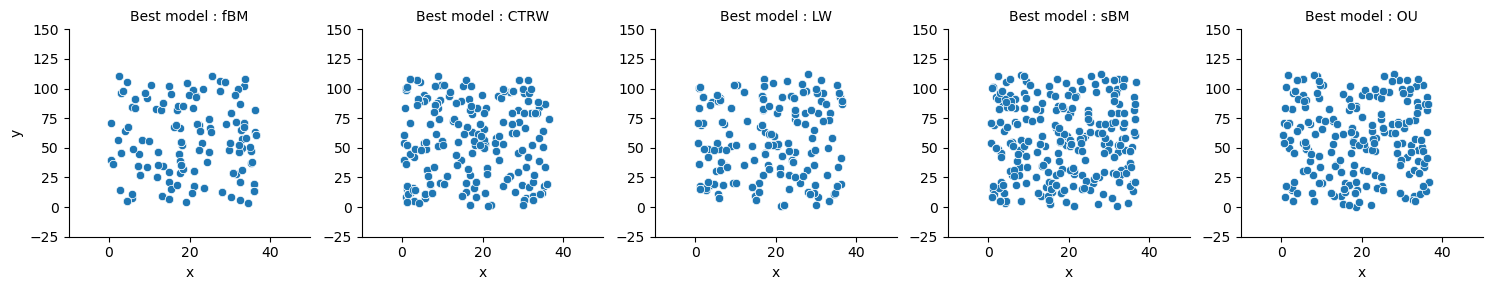

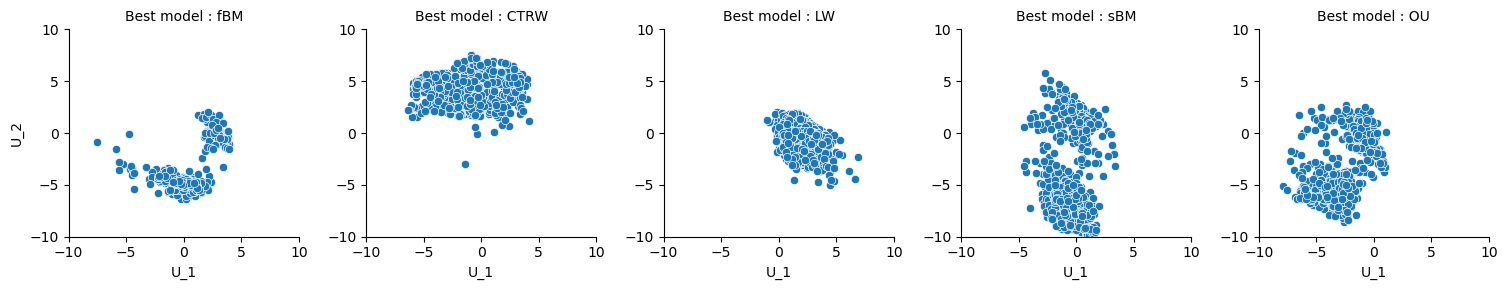

In [73]:
g = sns.FacetGrid(workingdf, col='best_model',sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x= 'x', y= 'y')
g.set(xlim=(-10, 50))
g.set(ylim=(-25, 150))
g.set_titles(col_template='Best model : {col_name}')

z = sns.FacetGrid(workingdf, col='best_model',sharex=False, sharey=False)
z.map_dataframe(sns.scatterplot, x= 'U_1', y= 'U_2')
z.set(xlim=(-10, 10))
z.set(ylim=(-10, 10))
z.set_titles(col_template='Best model : {col_name}')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

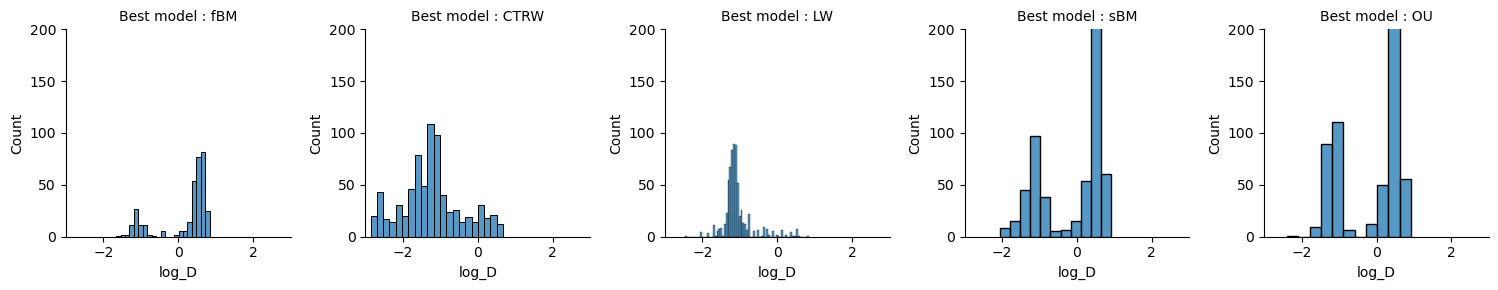

In [74]:
u = sns.FacetGrid(workingdf, col='best_model',sharex=False, sharey=False)
u.map_dataframe(sns.histplot, 'log_D')
u.set(xlim=(-3,3))
u.set(ylim=(0,200))
u.set_titles(col_template='Best model : {col_name}')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

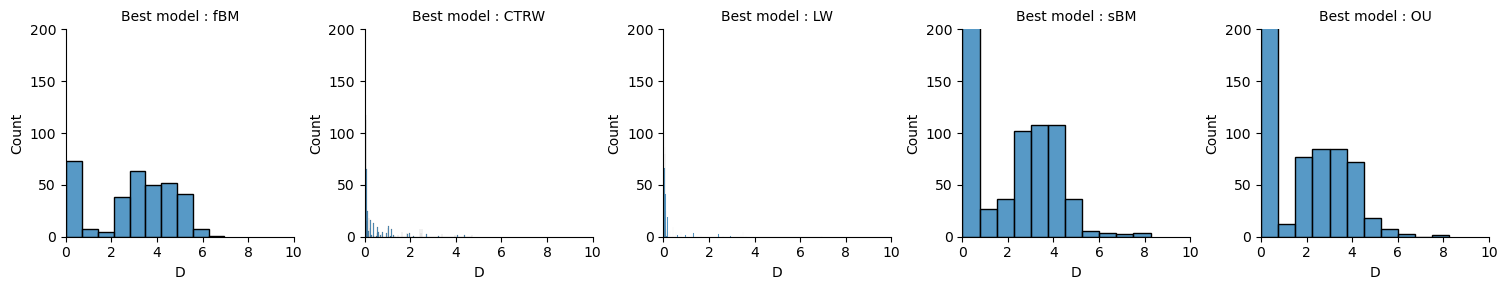

In [75]:
u = sns.FacetGrid(workingdf, col='best_model',sharex=False, sharey=False)
u.map_dataframe(sns.histplot, 'D')
u.set(xlim=(0,10))
u.set(ylim=(0,200))
u.set_titles(col_template='Best model : {col_name}')

## Analizing data within the latent space



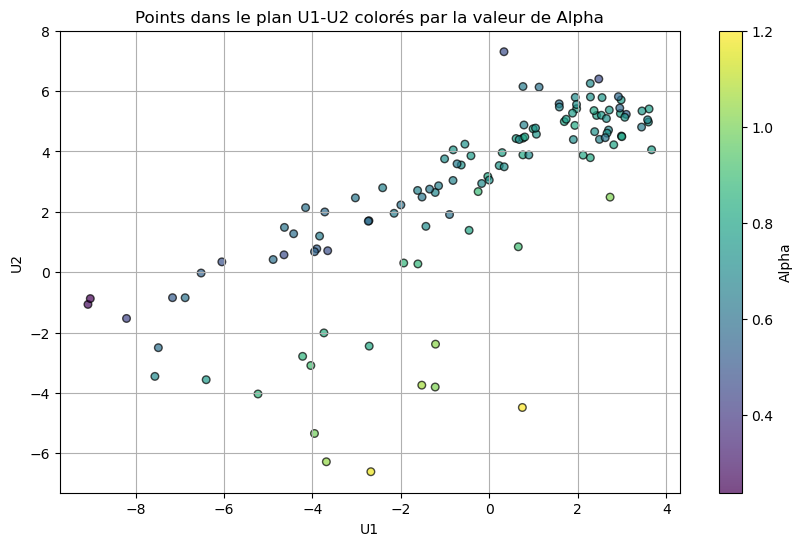

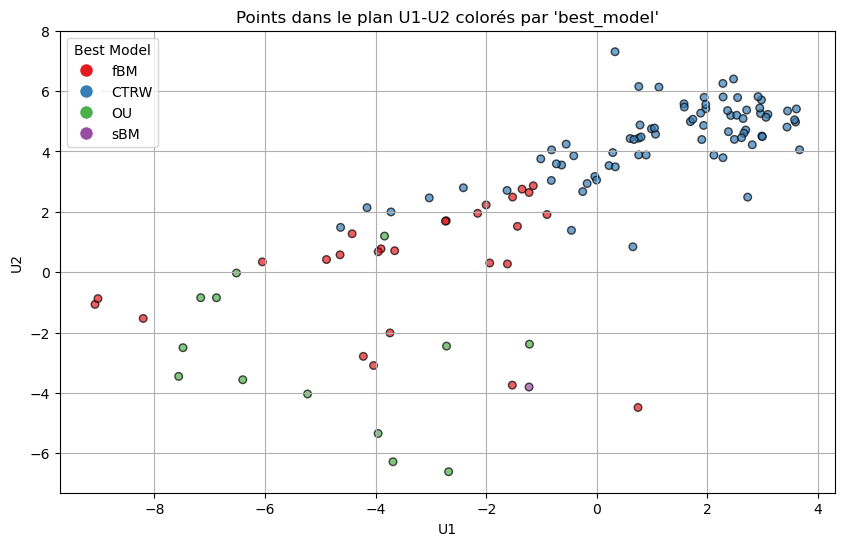

KeyError: 'D'

In [4]:
# Charger le fichier CSV
def load_data(file_path):
    return pd.read_csv(file_path)

# Fonction pour tracer les points colorés par alpha
def plot_by_alpha(data):
    U1 = data['U_1']
    U2 = data['U_2']
    alpha = data['alpha']

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=alpha, cmap='viridis', s=30, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Alpha')
    plt.title("Points dans le plan U1-U2 colorés par la valeur de Alpha")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

# Fonction pour tracer les points colorés par best_model
def plot_by_best_model(data):
    U1 = data['U_1']
    U2 = data['U_2']
    unique_models = data['best_model'].unique()
    colors = {model: color for model, color in zip(unique_models, plt.cm.Set1.colors)}

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=data['best_model'].map(colors), s=30, edgecolor='k', alpha=0.7)

    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=model) 
                     for model, color in colors.items()]

    plt.legend(handles=legend_labels, title="Best Model")
    plt.title("Points dans le plan U1-U2 colorés par 'best_model'")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

#fonction pour tracer selon densité
def plot_by_density(data):
    U1 = data['U_1']
    U2 = data['U_2']
    alpha = data['D']

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=alpha, cmap='viridis', s=30, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Density')
    plt.title("Points dans le plan U1-U2 colorés par 'D'")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

#fonction pour tracer selon nb points
def plot_by_n_points(data):
    U1 = data['U_1']
    U2 = data['U_2']
    alpha = data['n_points']

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=alpha, cmap='viridis', s=30, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Alpha')
    plt.title("Points dans le plan U1-U2 colorés par 'n_points'")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

#fonction pour tracer selon nb points
def plot_by_log_D(data):
    U1 = data['U_1']
    U2 = data['U_2']
    alpha = data['log_D']

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=alpha, cmap='viridis', s=30, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='log_D')
    plt.title("Points dans le plan U1-U2 colorés par 'log_D'")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()


# Exemple d'utilisation
file_path = "../../data/experimental_data/gratin_results_for_tracktor_film9.csv"

data = load_data(file_path)

# Appeler chaque fonction pour visualiser
plot_by_alpha(data)       # Tracer les points par alpha
plot_by_best_model(data)  # Tracer les points par best_model
plot_by_density(data)
plot_by_n_points(data)
plot_by_log_D(data)

Before we plot any data we need to create a few functions. The first is a create plot function, which will take a number of arguments and our facies curve, and will generate a conventional log plot.

In [16]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], model_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    model_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in model_curves:
            cmap_facies = colors.ListedColormap(model_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), extent=[0,20, depth_curve.max(), depth_curve.min()])
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

### Splitting Data by Well Function
The second method we will create will be used to split up our dataframe by wells. This is done using the `groupby` function, and will allow us to store each dataframe within a list for easy access later.

In [78]:
"""def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames"""

"def well_splitter(dataframe, groupby_column):\n    grouped = dataframe.groupby(groupby_column)\n    \n    # Create empty lists\n    wells_as_dfs = []\n    wells_wellnames = []\n\n    #Split up the data by well\n    for well, data in grouped:\n        wells_as_dfs.append(data)\n        wells_wellnames.append(well)\n\n    print('index  wellname')\n    for i, name in enumerate(wells_wellnames):\n        print(f'{i}      {name}')\n    \n    return wells_as_dfs, wells_wellnames"

In [79]:
#grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

We now have a list of wells and their index position with the list object. 

## Clustering - Unsupervised

In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Finding the Optimum Number of Clusters

To make sure that K-Means and Gaussian Mixture Modelling models are working efficiently we need to provide them with a starting number of clusters. If the number of clusters is incorrectly selected, the algorithms may not perform well or could take longer to resolve (especially if the number is too high).

We can attempt to identify the optimum number of clusters using an elbow plot, where the goal is to select a number for the clusters based on the 'elbow' or inflection formed in the results. There are other methods such as the silhouette method for picking the number of clusters.

For this example, we will use the elbow plot. To do this we evaluate the model performance over a given range of clusters, and then from the plot identify the most suitable number.

In [22]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

For clustering to work, we need to remove any missing values. This is achieved using the `dropna()` function.

In [30]:
import pandas as pd
workingdf=load_data(file_path)
workingdf.dropna(inplace=True)

We can then use the `describe()` function to make sure our data is still good after the missing data values have been removed.

In [31]:
workingdf.describe()

Unnamed: 0        p_fBM          p_LW        p_sBM         p_OU  \
count  4000.000000  4000.000000  4.000000e+03  4000.000000  4000.000000   
mean   1999.500000     0.752857  2.461312e-05     0.213639     0.033473   
std    1154.844867     0.181786  4.780586e-05     0.173923     0.043816   
min       0.000000     0.010155  2.360805e-07     0.005226     0.000237   
25%     999.750000     0.666200  5.108604e-06     0.088209     0.009699   
50%    1999.500000     0.800270  1.192085e-05     0.164216     0.018707   
75%    2999.250000     0.887503  2.681972e-05     0.282750     0.038790   
max    3999.000000     0.991058  1.231325e-03     0.986085     0.545432   

             p_CTRW        alpha  length          U_1          U_2  ...  \
count  4.000000e+03  4000.000000  4000.0  4000.000000  4000.000000  ...   
mean   6.116561e-06     1.391808   500.0     1.555550    -5.721079  ...   
std    1.104019e-05     0.108136     0.0     0.796069     0.788359  ...   
min    7.346208e-08     0.820443   500.0    -4.360091    -9.324096  ...   
25%    1.040207e-06     1.324626   500.0     1.240999    -6.081837  ...   
50%    2.554554e-06     1.392664   500.0     1.723572    -5.654776  ...   
75%    6.574802e-06     1.456012   500.0     2.108336    -5.239685  ...   
max    2.767263e-04     1.819661   500.0     2.871812    -2.700869  ...   

               h_8          h_9         h_10         h_11         h_12  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -1.873157     0.773807    -0.126812    -1.327810    -0.151817   
std       0.270252     0.610142     0.492399     0.433353     0.385768   
min      -2.629121    -1.941421    -2.509454    -2.727990    -1.764226   
25%      -2.063538     0.417805    -0.453265    -1.631528    -0.379180   
50%      -1.888404     0.815256    -0.099263    -1.306411    -0.143161   
75%      -1.710047     1.191929     0.227967    -0.991039     0.087057   
max      -0.714111     2.683319     1.152670    -0.148927     1.088916   

              h_13         h_14         h_15         h_16            n  
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  
mean     -0.716866    -1.597208     1.556133    -2.084273  1999.500000  
std       0.259668     0.318067     0.507921     0.566659  1154.844867  
min      -1.753792    -2.424336     0.306087    -3.642688     0.000000  
25%      -0.894992    -1.822308     1.179118    -2.495511   999.750000  
50%      -0.739994    -1.613323     1.515593    -2.125294  1999.500000  
75%      -0.552026    -1.386264     1.900644    -1.729632  2999.250000  
max       0.371841    -0.456898     3.379888     0.200991  3999.000000  

[8 rows x 27 columns]

To keep our model simple we will work with 2 columns u_1 et u_2 but we could have used more.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

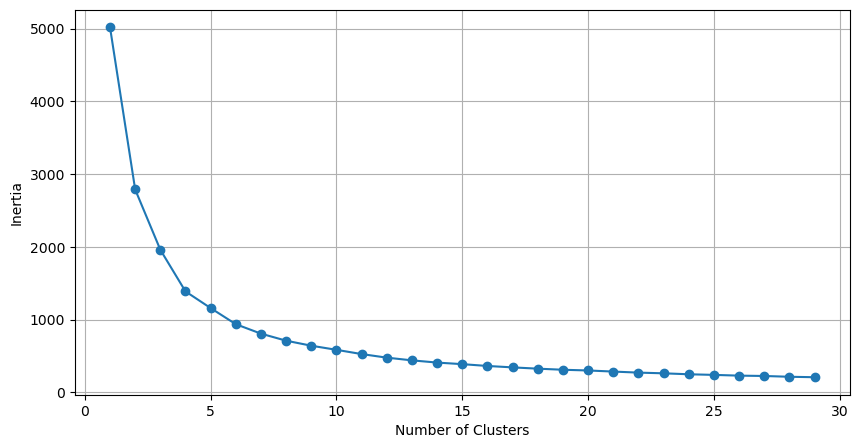

In [32]:
optimise_k_means(workingdf[[ 'U_1', 'U_2']],30)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 3 clusters onwards. 

### Fitting the Clustering Models

In [37]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to our dataset
kmeans.fit(workingdf[['U_1', 'U_2']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Plotting the Results

Now that the clusters have been computed using KMeans method, we can plot the data to see how well the predicted in relation to the labelled models. Note that this methods is unsupervised and do not use the labelled data for training. 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


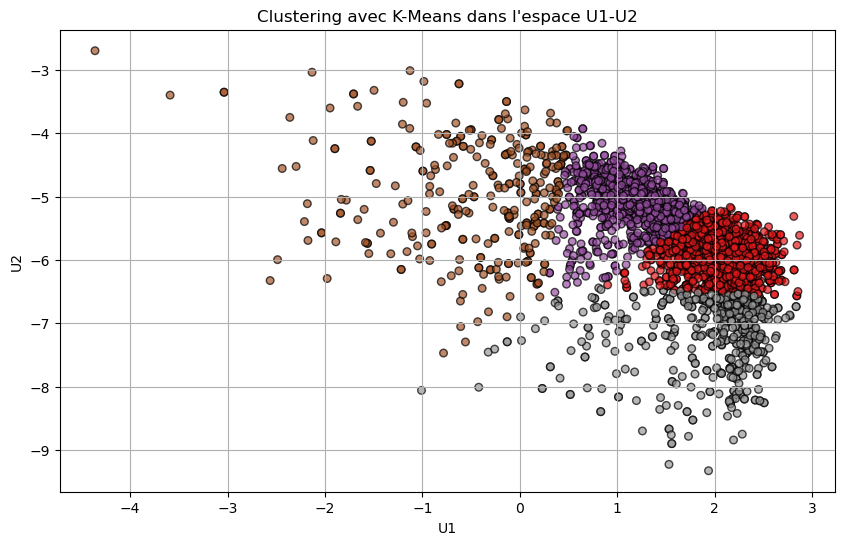

In [39]:
# Charger le fichier CSV
def load_data(file_path):
    return pd.read_csv(file_path)

# Fonction pour afficher des clusters et ellipses
def plot_clusters(data, n_clusters=4):
    U1 = data['U_1']
    U2 = data['U_2']

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[['U_1', 'U_2']])

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=clusters, cmap='Set1', s=30, edgecolor='k', alpha=0.7)

    plt.title("Clustering avec K-Means dans l'espace U1-U2")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

# Exemple d'utilisation
file_path = "../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv"

data = load_data(file_path)

plot_clusters(data)

#file_path_16D = r'data/experimental_data/gratin_results_for_n2_+myoIb_1_trackedPar.csv'

#newdata = load_data(file_path_16D)

#plot_clusters(newdata)  # Tracer les clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


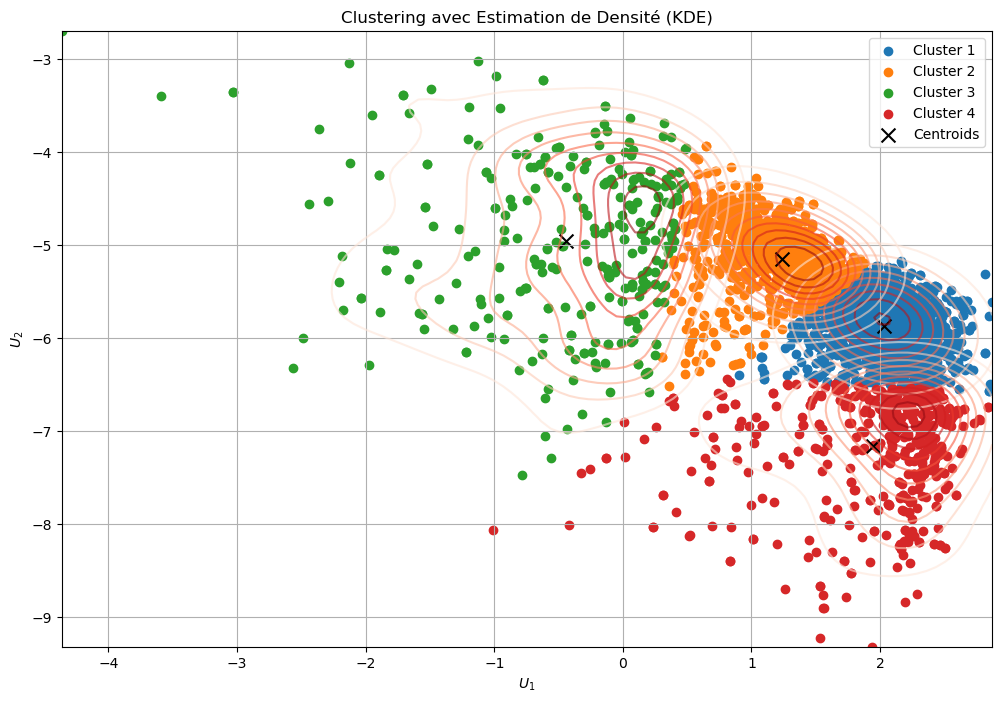

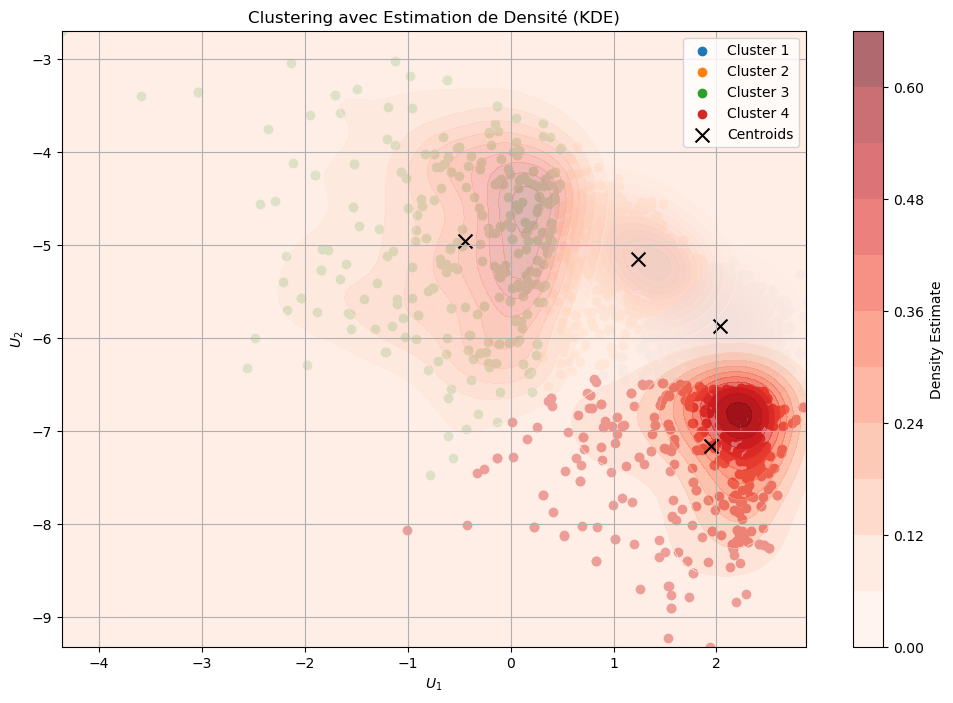

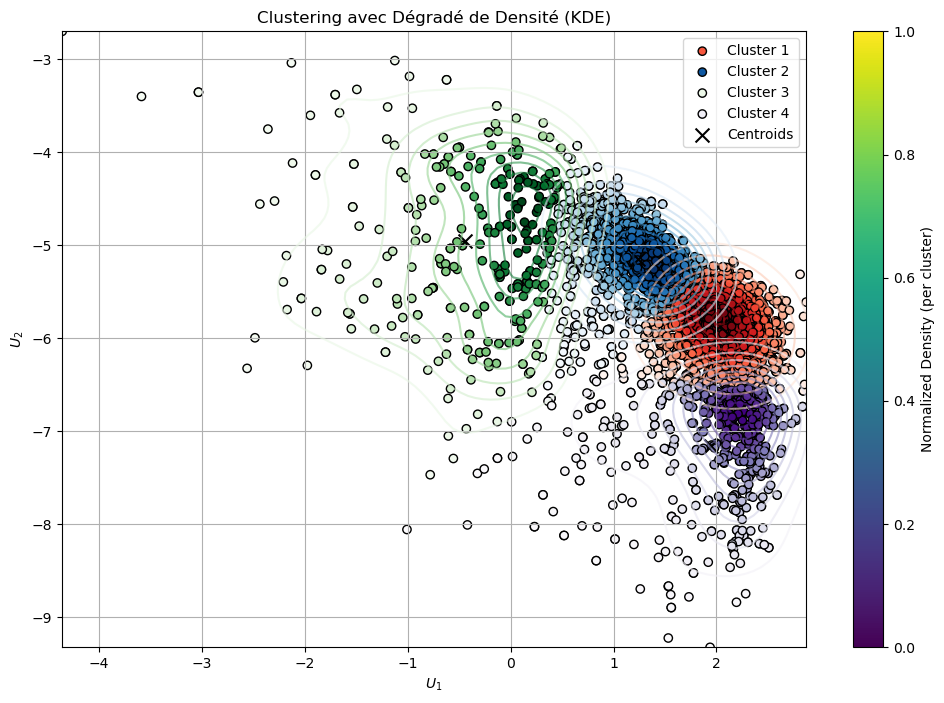

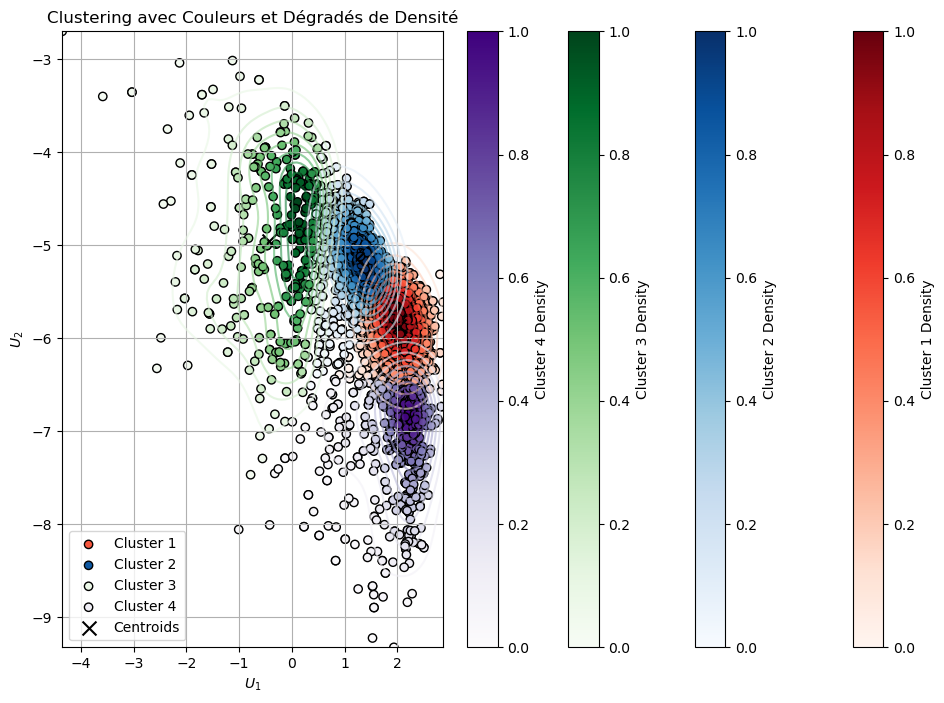

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import pandas as pd

# Charger les fichiers pour examiner leur structure

file1_path = "../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv"
#file1_path = "../../data/experimental_data/gratin_results_for_0deb5656cadde25b.csv"
#file2_path = r'data/experimental_data/n2_+myoIb_1_trackedPar.csv'

# Chargement des fichiers CSV
data = pd.read_csv(file1_path)
#data2 = pd.read_csv(file2_path)
# Paramètres
n_clusters = 4  # Nombre de clusters (modifiable)

# Extraction des colonnes U_1 et U_2
u1_u2 = data[['U_1', 'U_2']].dropna()

# Étape 1: Clustering avec K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(u1_u2)

# Étape 2: Estimation de la densité pour chaque cluster
densities = []
grid_size = 100
x_min, x_max = u1_u2['U_1'].min(), u1_u2['U_1'].max()
y_min, y_max = u1_u2['U_2'].min(), u1_u2['U_2'].max()
x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, grid_size),
    np.linspace(y_min, y_max, grid_size)
)
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

for cluster in range(n_clusters):
    cluster_points = u1_u2[labels == cluster]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(cluster_points)
    log_density = kde.score_samples(grid_points)
    densities.append(np.exp(log_density).reshape(grid_size, grid_size))

# Étape 3: Visualisation des clusters et densités
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_points = u1_u2[labels == cluster]
    plt.scatter(
        cluster_points['U_1'], cluster_points['U_2'], label=f"Cluster {cluster + 1}"
    )
    plt.contour(
        x_grid, y_grid, densities[cluster], levels=10, alpha=0.6, cmap="Reds"
    )

# Ajouter les centres de clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='x', label='Centroids', s=100)

plt.title('Clustering avec Estimation de Densité (KDE)')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.legend()
plt.grid(True)
plt.show()

# Réinitialisation de la figure pour inclure la légende des densités
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_points = u1_u2[labels == cluster]
    plt.scatter(
        cluster_points['U_1'], cluster_points['U_2'], label=f"Cluster {cluster + 1}"
    )
    contour = plt.contourf(
        x_grid, y_grid, densities[cluster], levels=10, alpha=0.6, cmap="Reds"
    )

# Ajouter une barre de couleur pour représenter les densités
cbar = plt.colorbar(contour, label="Density Estimate")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='x', label='Centroids', s=100)

plt.title('Clustering avec Estimation de Densité (KDE)')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.legend()
plt.grid(True)
plt.show()

# Nouvelle figure avec dégradé de couleur selon la densité
plt.figure(figsize=(12, 8))
color_maps = ['Reds', 'Blues', 'Greens','Purples','Oranges']  # Palettes pour chaque cluster

for cluster in range(n_clusters):
    cluster_points = u1_u2[labels == cluster].values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(cluster_points)
    log_density = kde.score_samples(cluster_points)
    density = np.exp(log_density)
    
    # Normaliser les densités pour le cluster (0 à 1 pour correspondre à la palette)
    density_norm = (density - density.min()) / (density.max() - density.min())
    
    # Afficher les points avec un dégradé selon la densité
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        c=density_norm, cmap=color_maps[cluster], label=f"Cluster {cluster + 1}", edgecolor='k'
    )
    
    # Dessiner les contours de densité
    plt.contour(
        x_grid, y_grid, densities[cluster], levels=10, alpha=0.6, cmap=color_maps[cluster]
    )

# Ajouter les centres des clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='x', label='Centroids', s=100)

# Ajouter une légende des clusters
plt.colorbar(label="Normalized Density (per cluster)")
plt.title('Clustering avec Dégradé de Densité (KDE)')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.legend()
plt.grid(True)
plt.show()


# Nouvelle figure avec des couleurs différentes pour chaque cluster et dégradé interne
plt.figure(figsize=(12, 8))
color_maps = ['Reds', 'Blues', 'Greens','Purples','Oranges']  # Couleurs pour chaque cluster

for cluster in range(n_clusters):
    cluster_points = u1_u2[labels == cluster].values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(cluster_points)
    log_density = kde.score_samples(cluster_points)
    density = np.exp(log_density)
    
    # Normaliser les densités pour le cluster (0 à 1 pour correspondre à la palette)
    density_norm = (density - density.min()) / (density.max() - density.min())
    
    # Afficher les points avec un dégradé selon la densité
    scatter = plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        c=density_norm, cmap=color_maps[cluster], label=f"Cluster {cluster + 1}", edgecolor='k'
    )
    
    # Ajouter une barre de couleur pour chaque cluster
    cbar = plt.colorbar(scatter, label=f"Cluster {cluster + 1} Density")
    
    # Dessiner les contours de densité
    plt.contour(
        x_grid, y_grid, densities[cluster], levels=10, alpha=0.6, cmap=color_maps[cluster]
    )

# Ajouter les centres des clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='x', label='Centroids', s=100)

# Ajuster les titres et légendes
plt.title('Clustering avec Couleurs et Dégradés de Densité')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.legend()
plt.grid(True)
plt.show()

## Clustering directly in the 16D latent space

In [44]:
#dfl = pd.read_csv("data/experimental_data/gratin_results_for_0deb5656cadde25b.csv")
dfl= pd.read_csv("../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv")

print(dfl.columns)

workingdfl=dfl

print(workingdfl)

Index(['Unnamed: 0', 'best_model', 'p_fBM', 'p_LW', 'p_sBM', 'p_OU', 'p_CTRW',
       'alpha', 'length', 'U_1', 'U_2', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5',
       'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14',
       'h_15', 'h_16', 'n'],
      dtype='object')
      Unnamed: 0 best_model     p_fBM          p_LW     p_sBM      p_OU  \
0              0        fBM  0.907967  2.323474e-05  0.062440  0.029568   
1              1        fBM  0.805085  9.551836e-07  0.081759  0.113143   
2              2        fBM  0.797234  1.053537e-05  0.186094  0.016652   
3              3        fBM  0.839258  3.389466e-06  0.151898  0.008826   
4              4        fBM  0.760893  1.083149e-05  0.182666  0.056429   
...          ...        ...       ...           ...       ...       ...   
3995        3995        fBM  0.959957  6.513138e-05  0.035590  0.004388   
3996        3996        fBM  0.801257  3.325161e-05  0.164880  0.033828   
3997        3997        fBM  0.890606  5.3845

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

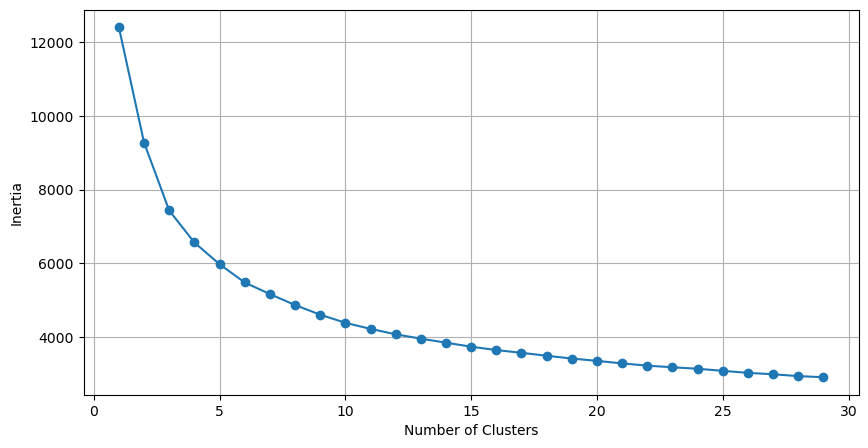

In [46]:
#Find the number of high dimensional clusters
optimise_k_means(workingdfl[[ 'h_1', 'h_2','h_3','h_4','h_5','h_6','h_7','h_8','h_9','h_10','h_11','h_12','h_13','h_14','h_15','h_16']], 30)

In [90]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to our dataset
kmeans.fit(workingdfl[['h_1', 'h_2','h_3','h_4','h_5','h_6','h_7','h_8','h_9','h_10','h_11','h_12','h_13','h_14','h_15','h_16']])

# Assign the data back to the workingdf
workingdfl['KMeans'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


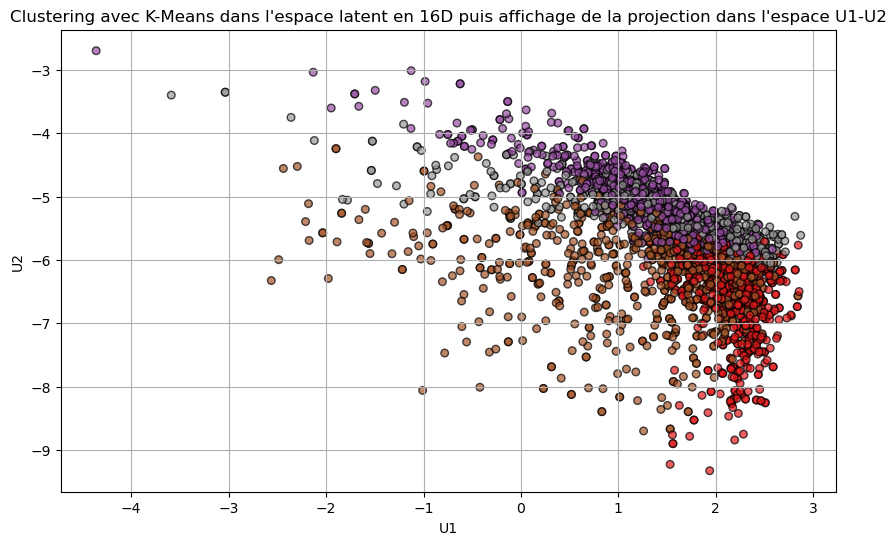

In [52]:
# Fonction pour afficher en 2D grâce à Umap des clusters obtenus après l'analyse en 16D
def plot_clusters_from_16D_in_2D(data, n_clusters=4):
    U1 = data['U_1']
    U2 = data['U_2']

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[['h_1', 'h_2','h_3','h_4','h_5','h_6','h_7','h_8','h_9','h_10','h_11','h_12','h_13','h_14','h_15','h_16']])

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(U1, U2, c=clusters, cmap='Set1', s=30, edgecolor='k', alpha=0.7)

    plt.title("Clustering avec K-Means dans l'espace latent en 16D puis affichage de la projection dans l'espace U1-U2")
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.grid(True)
    plt.show()

#file_path_16D = r'data/experimental_data/gratin_results_for_n2_+myoIb_1_trackedPar.csv'
file_path_16D = r"../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv"

newdata = load_data(file_path_16D)    

plot_clusters_from_16D_in_2D(newdata)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_1867/2817685163.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_colors = plt.cm.get_cmap('tab10', n_clusters)


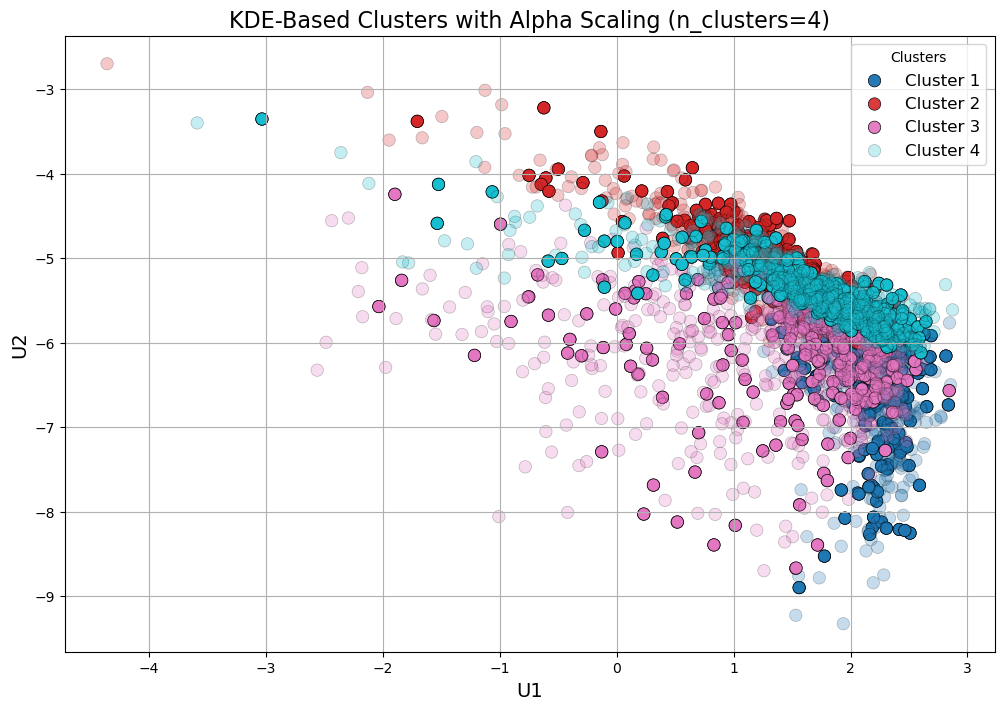

In [51]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Function to load data (placeholder for your actual data loader)
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to plot clusters with KDE and adjusted alpha scaling
def plot_16D_kde_clusters(data, n_clusters=5, bandwidth=0.5, point_size=60):
    # Extract the 16D features and 2D projection data
    features_16D = data[['h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8',
                          'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16']]
    U1 = data['U_1']
    U2 = data['U_2']
    
    # Perform K-Means clustering on the 16D space
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_16D)
    
    # Create a color map for clusters
    cluster_colors = plt.cm.get_cmap('tab10', n_clusters)

    # Initialize the plot
    plt.figure(figsize=(12, 8))
    plt.title(f"KDE-Based Clusters with Alpha Scaling (n_clusters={n_clusters})", fontsize=16)
    plt.xlabel("U1", fontsize=14)
    plt.ylabel("U2", fontsize=14)
    
    # Loop through each cluster to compute KDE and plot
    for cluster_idx in range(n_clusters):
        # Get points belonging to the current cluster
        cluster_points = features_16D[clusters == cluster_idx]
        cluster_U1 = U1[clusters == cluster_idx]
        cluster_U2 = U2[clusters == cluster_idx]
        
        # Compute KDE for the cluster in 16D
        kde = gaussian_kde(cluster_points.T, bw_method=bandwidth)
        cluster_density = kde(cluster_points.T)  # Density values for each point
        
        # Normalize density for alpha scaling (0.25 to 1)
        norm = Normalize(vmin=cluster_density.min(), vmax=cluster_density.max())
        alpha_values = 0.25 + 0.75 * norm(cluster_density)  # Scale to [0.25, 1]
        
        # Plot each point with intensity based on its density
        plt.scatter(cluster_U1, cluster_U2, c=[cluster_colors(cluster_idx)] * len(cluster_U1),
                    alpha=alpha_values, s=point_size, edgecolor='k', linewidth=0.5,
                    label=f"Cluster {cluster_idx + 1}")

    # Add legend and grid
    plt.legend(title="Clusters", loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

# File path to your data
#file_path_16D = r'data/experimental_data/gratin_results_for_n2_+myoIb_1_trackedPar.csv'
file_path_16D = r"../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv"


# Load the data
newdata = load_data(file_path_16D)

# Plot the KDE with clusters
plot_16D_kde_clusters(newdata, n_clusters=4, bandwidth=0.5, point_size=80)

## DBSCAN

Clustering DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Étapes de l'algorithme :
Identifier les points noyaux :
Un point est un noyau si au moins \text{min_samples} points se trouvent à une distance eps ou moins de lui.

Étendre un cluster :
Si un noyau est trouvé, tous les points dans son rayon 
eps deviennent partie du cluster.
Ce processus est répété pour les noyaux adjacents jusqu'à ce qu'aucun nouveau point ne puisse être ajouté.

Marquer le bruit :
Les points qui ne font partie d'aucun cluster sont marqués comme du bruit (Cluster=−1).

on peut évaluer deux paramètres:
efs (plus eps est grand, plus les clusters seront larges, mais il peut regrouper des points peu liés.
Une valeur trop petite peut isoler des points qui devraient être dans un cluster) 

min samples (nombre minimum de points requis pour qu'un point soit considéré comme un noyau. 
Grand min samples => détection de clusters très denses uniquement. Valeur classique = nb dim + 1, à ajuster selon les résultats graphiques et le contexte global)


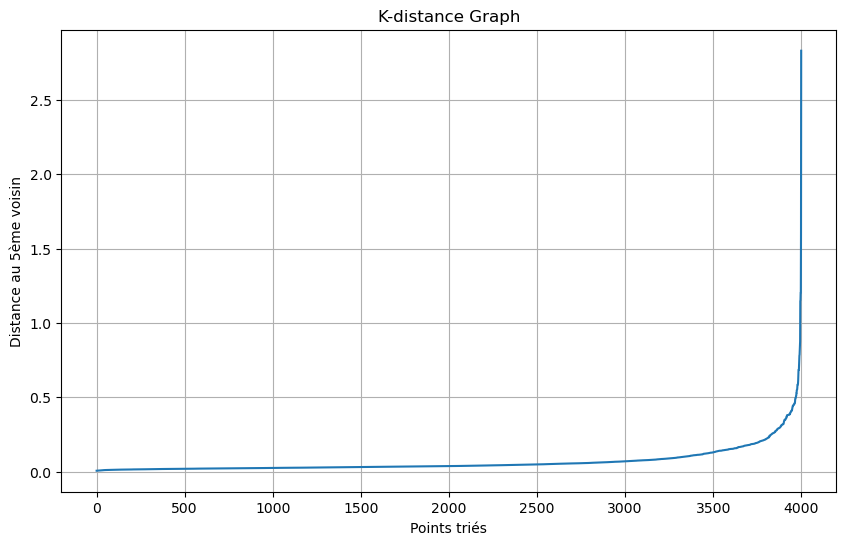

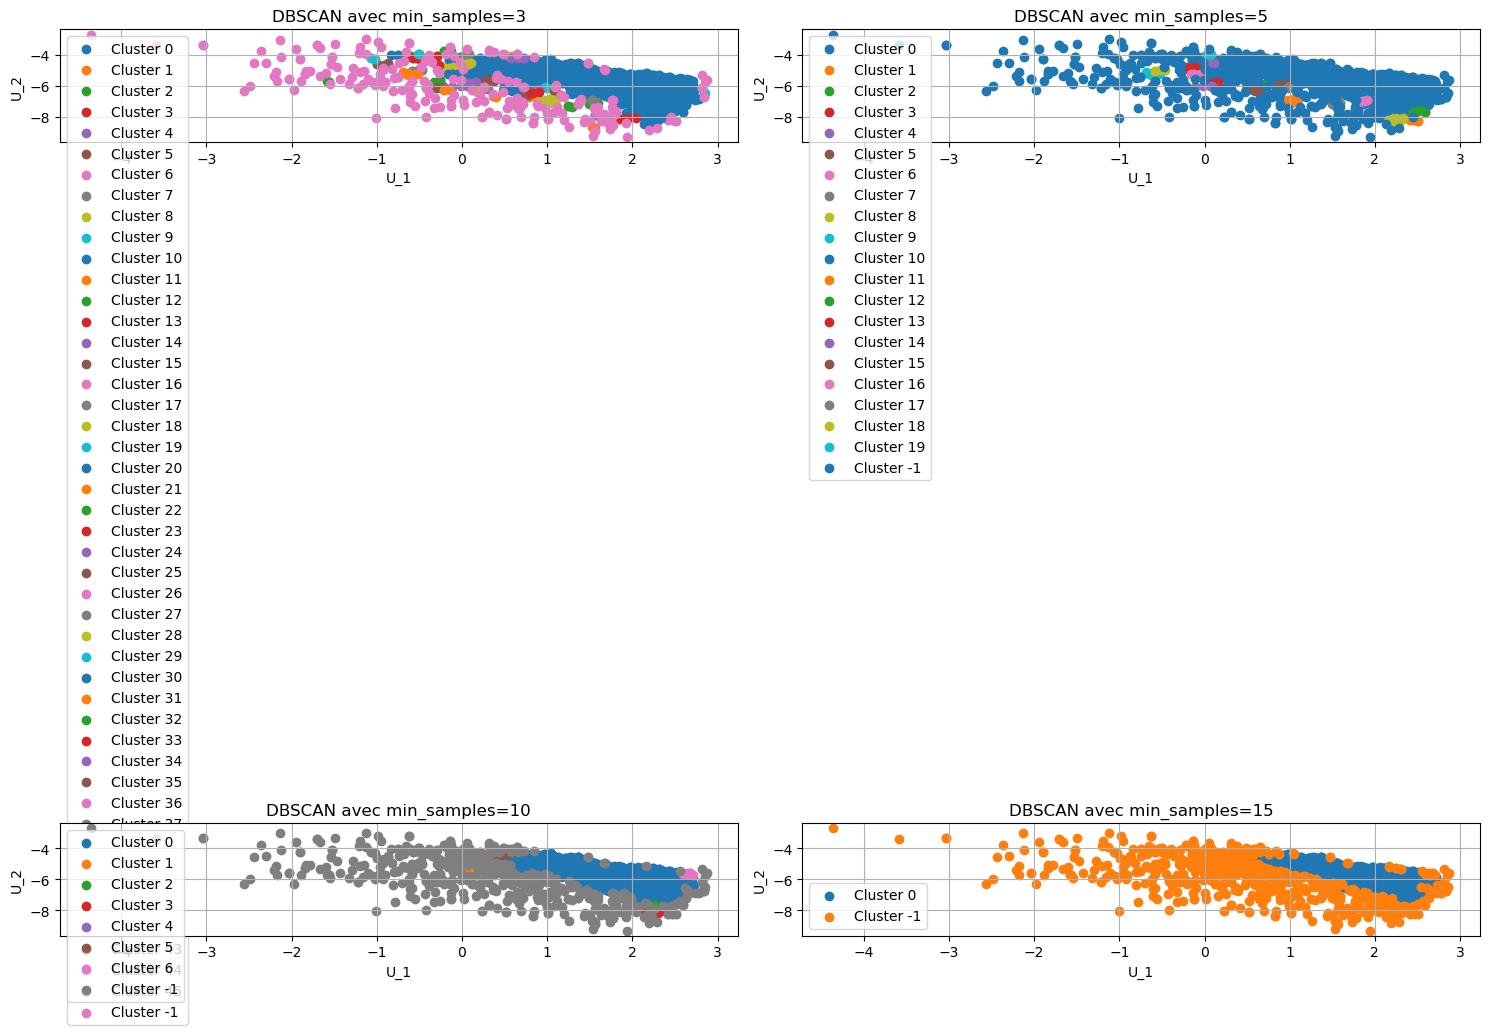

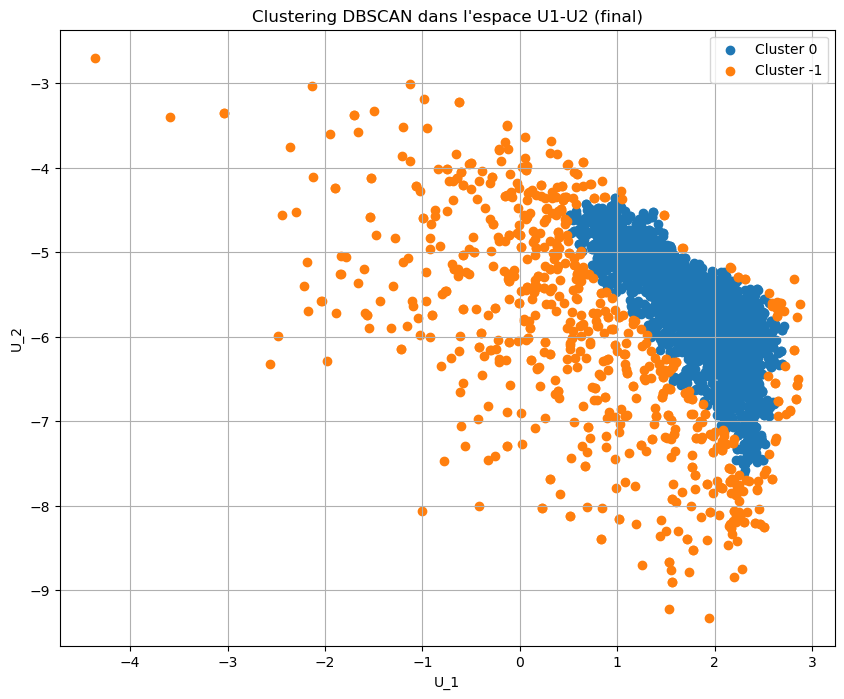

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Charger les données
#file_path = "data/experimental_data/gratin_results_for_0deb5656cadde25b.csv"
file_path = r"../../data/generated_data/gratin_results_for_combined_brownian_motion_walks.csv"

data = pd.read_csv(file_path)

# Extraction des colonnes U_1 et U_2
u1_u2 = data[['U_1', 'U_2']].dropna()

# Normalisation des données
scaler = StandardScaler()
u1_u2_scaled = scaler.fit_transform(u1_u2)

# Visualisation des distances pour choisir eps
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(u1_u2_scaled)
distances, indices = neighbors.kneighbors(u1_u2_scaled)

# Trier les distances pour visualiser le genou
sorted_distances = np.sort(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('K-distance Graph')
plt.xlabel('Points triés')
plt.ylabel('Distance au 5ème voisin')
plt.grid()
plt.show()

# Exploration des valeurs de min_samples et affichage des clusters
min_samples_values = [3, 5, 10, 15]
plt.figure(figsize=(15, 10))
for i, min_samples in enumerate(min_samples_values, 1):
    dbscan = DBSCAN(eps=0.14, min_samples=min_samples)
    clusters = dbscan.fit_predict(u1_u2_scaled)
    
    plt.subplot(2, 2, i)
    for cluster in set(clusters):
        cluster_points = u1_u2[clusters == cluster]
        plt.scatter(cluster_points['U_1'], cluster_points['U_2'], label=f'Cluster {cluster}')
    
    plt.title(f'DBSCAN avec min_samples={min_samples}')
    plt.xlabel('U_1')
    plt.ylabel('U_2')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Application finale de DBSCAN avec les paramètres choisis
dbscan = DBSCAN(eps=0.14, min_samples=15)
clusters = dbscan.fit_predict(u1_u2_scaled)

# Ajout des étiquettes de clusters au DataFrame
u1_u2['Cluster'] = clusters

# Affichage graphique des clusters finaux
plt.figure(figsize=(10, 8))
for cluster in set(clusters):
    cluster_points = u1_u2[u1_u2['Cluster'] == cluster]
    plt.scatter(cluster_points['U_1'], cluster_points['U_2'], label=f'Cluster {cluster}')

plt.title('Clustering DBSCAN dans l\'espace U1-U2 (final)')
plt.xlabel('U_1')
plt.ylabel('U_2')
plt.legend()
plt.grid()
plt.show()

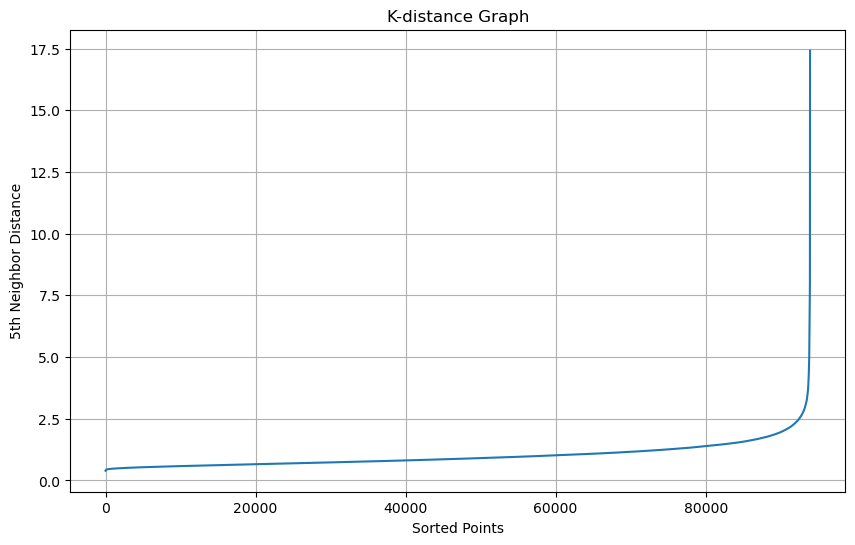

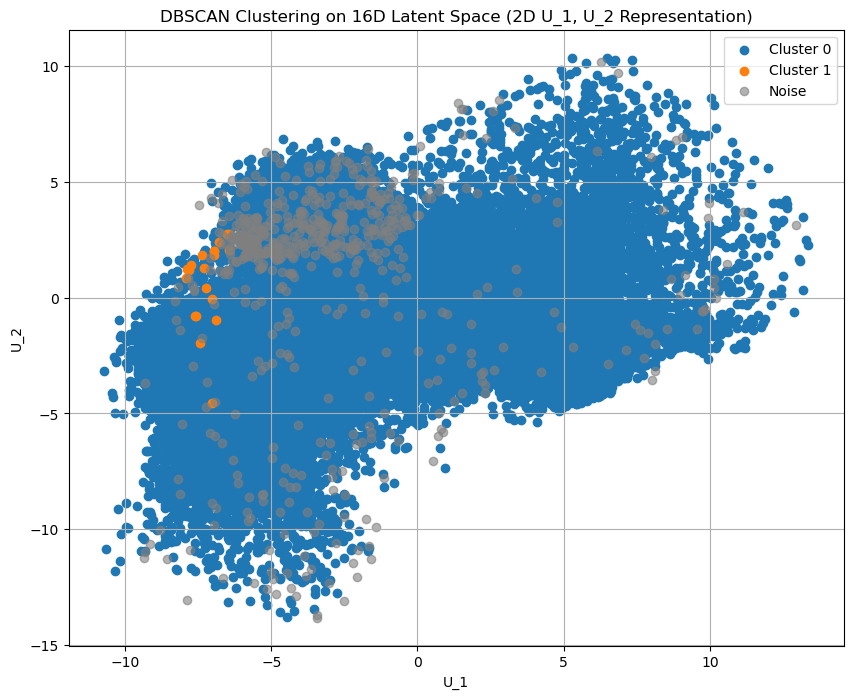

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np 

# Load the data
#file_path = "data/experimental_data/gratin_results_for_0deb5656cadde25b.csv"
file_path_16D = r"../../data/generated_data/processed_trajectories.csv"

data = pd.read_csv(file_path)

# Extract 16D latent features
latent_features = data[['h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8',
                        'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16']].dropna()

# Normalize the 16D latent space
scaler = StandardScaler()
features_scaled = scaler.fit_transform(latent_features)

# Compute the K-Distance graph to determine the optimal `eps`
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Sort distances (10th nearest neighbor) and plot the K-distance graph
sorted_distances = np.sort(distances[:, -1])

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('K-distance Graph')
plt.xlabel('Sorted Points')
plt.ylabel('5th Neighbor Distance')
plt.grid()
plt.show()

# Manually select the optimal `eps` by inspecting the graph
# You can change this value based on the "elbow" or knee of the curve in the plot above
optimal_eps = 2.5  # Replace this with your chosen value based on the graph

# Apply DBSCAN with manually selected `eps`
dbscan = DBSCAN(eps=optimal_eps, min_samples=10)
clusters = dbscan.fit_predict(features_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Extract U_1 and U_2 for visualization (assuming U_1 and U_2 exist in the DataFrame)
u1_u2 = data[['U_1', 'U_2']].dropna()  # Ensure that U_1 and U_2 are present in the data

# Plot the clusters in the 2D U_1, U_2 space
plt.figure(figsize=(10, 8))
unique_clusters = set(clusters)

for cluster in unique_clusters:
    cluster_points = u1_u2[data['Cluster'] == cluster]  # Filter the points based on the cluster label
    if cluster == -1:  # Noise points
        plt.scatter(cluster_points['U_1'], cluster_points['U_2'], c='gray', alpha=0.6, label='Noise')
    else:
        plt.scatter(cluster_points['U_1'], cluster_points['U_2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering on 16D Latent Space (2D U_1, U_2 Representation)')
plt.xlabel('U_1')
plt.ylabel('U_2')
plt.legend()
plt.grid()
plt.show()

In [48]:
import pandas as pd

# Charger les fichiers
#results_path = "../../data/experimental_data/gratin_results_for_0deb5656cadde25b.csv"
#locs_path = "../../data/experimental_data/0deb5656cadde25b.locs"
#results_path = "../../data/experimental_data/gratin_results_for_processed_segmented_trajectories.csv"
#locs_path = "../../data/experimental_data/processed_segmented_trajectories.csv"
locs_path = "../../data/experimental_data/0deb5656cadde25b_segmented_trajectories.csv"
results_path = "../../data/experimental_data/gratin_results_for_0deb5656cadde25b_segmented_trajectories.csv"


# Lire les fichiers CSV
gratin_results = pd.read_csv(results_path)
locs_data = pd.read_csv(locs_path)

# Conserver uniquement les colonnes utiles de locs_data
locs_subset = locs_data[['n', 'on_axon', 'on_synapse']]

# Supprimer les doublons pour éviter les erreurs lors de la jointure
locs_subset = locs_subset.drop_duplicates(subset='n')

# Effectuer la jointure sur la colonne 'n'
merged_data = gratin_results.merge(locs_subset, on='n', how='left')

# Renommer les colonnes pour plus de clarté
#merged_data.rename(columns={'on_axon': 'on_axon', 'on_synapse': 'on_synapse'}, inplace=True)

# Sauvegarder le fichier CSV résultant
output_path = "../../data/experimental_data/0deb5656cadde25b_segmented_updated_gratin_results.csv"
merged_data.to_csv(output_path, index=False)

print(f"Le fichier mis à jour a été sauvegardé sous '{output_path}'")

Le fichier mis à jour a été sauvegardé sous '../../data/experimental_data/0deb5656cadde25b_segmented_updated_gratin_results.csv'


Text(0.5, 1.0, "Représentation des trajectoires dans l'espace U1-U2")

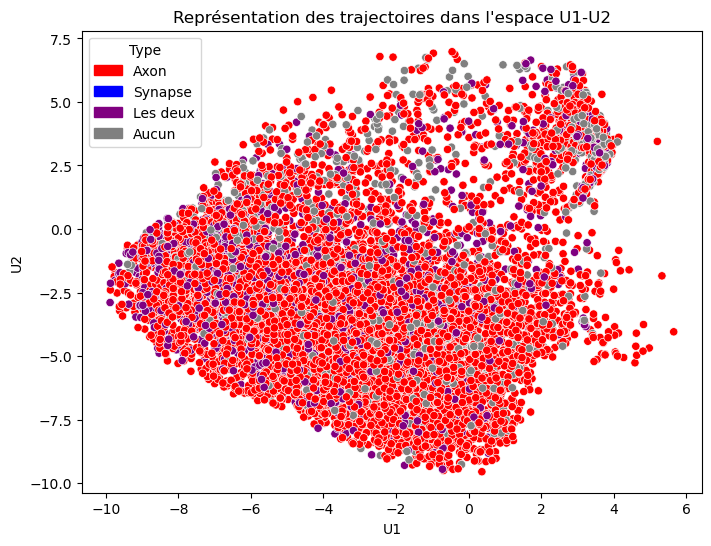

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = "../../data/experimental_data/0deb5656cadde25b_segmented_updated_gratin_results.csv"
df = pd.read_csv(file_path)

# Définir une couleur pour chaque combinaison de is_axon et is_synapse
def assign_color(row):
    if row['on_axon'] and row['on_synapse']:
        return 'purple'  # Les deux actifs
    elif row['on_axon']:
        return 'red'  # Seulement is_axon
    elif row['on_synapse']:
        return 'blue'  # Seulement is_synapse
    else:
        return 'gray'  # Aucun actif

# Appliquer les couleurs
df['color'] = df.apply(assign_color, axis=1)

# Tracé du nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['U_1'], y=df['U_2'], hue=df['color'], palette={'red': 'red', 'blue': 'blue', 'purple': 'purple', 'gray': 'gray'}, legend=False)

# Création de la légende personnalisée
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='red', label='Axon'),
    mpatches.Patch(color='blue', label='Synapse'),
    mpatches.Patch(color='purple', label='Les deux'),
    mpatches.Patch(color='gray', label='Aucun')
]
plt.legend(handles=legend_patches, title="Type")

plt.xlabel("U1")
plt.ylabel("U2")
plt.title("Représentation des trajectoires dans l'espace U1-U2")

In [26]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os



def process_files(input_files, output_file):
    # Initialiser un DataFrame vide pour fusionner les données
    combined_df = pd.DataFrame()

    for input_file in input_files:
        # Lire le fichier CSV
        df = pd.read_csv(input_file)

        # Sélectionner les colonnes nécessaires
        columns_to_keep = [
            "n","x","y","frame","t",
            "on_synapse", "on_axon"
        ]
        df = df[columns_to_keep]

        # Conserver les doublons et fusionner avec le DataFrame combiné
        combined_df = pd.concat([combined_df, df])

    # Trier par la colonne 'n', puis par 'on_axon' et 'on_synapse'
    combined_df = combined_df.sort_values(by=["n", "on_axon", "on_synapse"])

    # Sauvegarder dans un fichier CSV de sortie
    combined_df.to_csv("../../data/experimental_data/"+output_file, index=False)

input_files = ["../../data/experimental_data/0deb5656cadde25b.locs"]
    # Ajouter les chemins des autres fichiers ici
output_file = r"processed_segmented_trajectories.csv"

process_files(input_files, output_file)
print(f"Fichiers traités et sauvegardés dans : {output_file}")"""

/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_46153/1059521913.py:15: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Fichiers traités et sauvegardés dans : processed_segmented_trajectories.csv


In [44]:
import pandas as pd    

# Load the dataset
file_path = "../../data/experimental_data/0deb5656cadde25b.locs"  

def segment_trajectories_between_axon_and_synapse(file_path):
    df=pd.read_csv(file_path)
    #new_data = df.sort_values(by=["n","frame"])
    #print(new_data.head(n=20))
    new_df = pd.DataFrame(columns=df.columns)
    cpt_traj = 0
    for n in range(int(df['n'].max()) + 1):
    #for n in range(10000):
        selected_rows = df[df['n'] == n]
        selected_rows=selected_rows.reset_index(drop=True)
        if len(selected_rows)>5:
            #print(selected_rows)
            #print(selected_rows.loc[0])
            selected_rows.at[0, 'n'] = cpt_traj
            print(n,cpt_traj)
            new_df = pd.concat([new_df, selected_rows.iloc[[0]]], ignore_index=True)
            s=selected_rows.loc[0]['on_synapse']
            a=selected_rows.loc[0]['on_axon']
            j=1
            while j < len(selected_rows):
                while j < len(selected_rows) and selected_rows.loc[j, 'on_synapse'] == s and selected_rows.loc[j, 'on_axon'] == a:
                    selected_rows.at[j, 'n'] = cpt_traj
                    new_df = pd.concat([new_df, selected_rows.iloc[[j]]], ignore_index=True)
                    j+=1
                cpt_traj+=1
                if j < len(selected_rows):
                    selected_rows.at[j, 'n'] = cpt_traj
                    new_df = pd.concat([new_df, selected_rows.iloc[[j]]], ignore_index=True)
                    s=selected_rows.loc[j]['on_synapse']
                    a=selected_rows.loc[j]['on_axon']
                    j+=1
    print(new_df.head(n=20))
    return new_df
                    
            
new_data = segment_trajectories_between_axon_and_synapse(file_path)          
output_path = file_path.split('.locs')[0]+"_segmented_trajectories.csv"
new_data.to_csv(output_path)#, index=False)
print(output_path)

# Display a preview
#print(new_data.head())


/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_3913/2232447047.py:7: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_3913/2232447047.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, selected_rows.iloc[[0]]], ignore_index=True)


7 0
11 1
31 2
40 3
48 4
65 5
101 6
104 7
122 9
158 10
187 11
197 14
202 15
232 17
244 18
270 19
309 20
325 21
330 22
348 23
373 24
374 25
410 26
414 27
415 28
435 29
488 32
520 35
539 36
542 37
553 39
578 40
594 41
638 42
665 44
694 45
697 46
736 47
751 48
768 50
800 51
850 52
869 53
939 54
969 56
974 57
978 58
1002 59
1003 60
1050 61
1058 64
1067 65
1078 66
1082 70
1083 71
1086 74
1096 75
1105 76
1106 77
1150 82
1169 83
1171 84
1182 85
1226 86
1298 87
1321 88
1331 89
1432 90
1439 94
1460 95
1575 96
1584 97
1603 100
1612 104
1691 105
1727 106
1732 107
1734 108
1743 109
1766 110
1783 112
1801 115
1802 117
1806 118
1839 119
1841 120
1849 121
1857 123
1860 125
1881 126
1914 127
1921 129
1983 130
2008 131
2037 132
2082 134
2110 135
2111 136
2113 138
2116 139
2118 140
2125 141
2149 145
2152 146
2155 147
2158 148
2159 149
2186 150
2225 151
2244 152
2246 153
2272 158
2275 161
2296 164
2303 165
2309 168
2326 171
2354 172
2370 173
2375 174
2401 175
2416 178
2428 183
2441 184
2471 185
2494 186
2

15784 1320
15787 1321
15803 1322
15806 1325
15810 1326
15850 1327
15861 1328
15942 1329
15946 1330
15975 1331
16035 1332
16067 1333
16081 1334
16088 1335
16095 1336
16098 1337
16105 1341
16107 1342
16110 1343
16119 1344
16138 1345
16169 1346
16205 1347
16209 1348
16237 1349
16239 1350
16247 1351
16257 1354
16277 1355
16427 1356
16448 1357
16482 1361
16493 1362
16494 1366
16519 1367
16523 1368
16527 1369
16528 1375
16529 1376
16537 1377
16549 1378
16557 1379
16592 1380
16597 1381
16659 1382
16670 1384
16680 1387
16686 1388
16733 1389
16737 1390
16753 1391
16757 1392
16777 1399
16902 1400
16911 1401
16971 1402
16981 1403
16997 1404
17000 1405
17039 1408
17047 1409
17048 1410
17052 1411
17063 1413
17071 1414
17086 1415
17099 1416
17114 1417
17118 1418
17134 1420
17159 1421
17163 1422
17220 1423
17254 1425
17255 1426
17257 1427
17282 1428
17339 1429
17347 1430
17368 1431
17397 1432
17433 1433
17459 1434
17492 1435
17496 1436
17512 1437
17550 1440
17568 1441
17574 1442
17588 1443
17597 1444

29993 2353
29995 2354
29997 2355
30042 2356
30045 2357
30108 2358
30112 2359
30123 2364
30144 2365
30146 2366
30165 2368
30166 2370
30204 2371
30205 2372
30208 2373
30214 2377
30223 2378
30251 2379
30254 2380
30269 2381
30287 2384
30294 2387
30307 2389
30316 2390
30325 2391
30373 2392
30381 2394
30386 2395
30403 2396
30411 2397
30496 2398
30512 2400
30530 2401
30553 2402
30583 2403
30620 2404
30628 2405
30636 2406
30690 2407
30695 2417
30700 2418
30710 2419
30719 2423
30724 2424
30744 2425
30747 2426
30796 2427
30804 2428
30886 2430
30892 2431
30903 2432
30933 2433
30978 2436
30981 2438
31035 2439
31074 2441
31104 2442
31106 2443
31137 2444
31182 2445
31184 2446
31198 2447
31199 2448
31212 2449
31239 2450
31259 2451
31288 2453
31305 2456
31346 2457
31349 2458
31389 2459
31396 2464
31404 2465
31429 2466
31447 2467
31472 2470
31500 2471
31515 2472
31573 2473
31595 2474
31617 2475
31620 2476
31628 2479
31664 2482
31669 2483
31674 2484
31687 2486
31693 2487
31760 2492
31777 2493
31790 2494

44071 3512
44120 3513
44166 3515
44181 3517
44189 3521
44212 3522
44218 3523
44230 3526
44236 3527
44270 3528
44312 3529
44330 3530
44335 3533
44351 3534
44363 3535
44364 3539
44392 3540
44407 3541
44416 3544
44434 3545
44470 3546
44471 3548
44485 3549
44497 3550
44506 3551
44522 3552
44528 3553
44569 3554
44691 3555
44694 3556
44722 3557
44769 3558
44809 3559
44867 3561
44880 3564
44885 3565
44887 3568
44904 3569
44919 3570
44941 3576
44980 3577
44983 3578
45024 3579
45033 3580
45036 3581
45060 3582
45070 3583
45134 3584
45140 3585
45172 3586
45196 3589
45253 3593
45273 3594
45276 3595
45279 3598
45322 3601
45378 3602
45417 3603
45461 3604
45479 3605
45522 3606
45528 3613
45535 3616
45585 3617
45591 3618
45607 3619
45627 3620
45643 3621
45665 3622
45705 3623
45725 3625
45739 3626
45741 3627
45744 3628
45758 3629
45762 3630
45770 3631
45776 3633
45778 3634
45794 3635
45813 3636
45907 3637
45942 3638
45955 3640
45959 3641
45978 3645
45982 3648
45992 3649
46038 3650
46043 3652
46060 3653

58979 4605
58991 4606
59001 4607
59025 4608
59071 4609
59078 4611
59117 4614
59139 4615
59173 4616
59189 4617
59251 4618
59329 4620
59334 4621
59336 4624
59342 4625
59355 4626
59376 4627
59386 4628
59399 4629
59407 4630
59413 4631
59430 4632
59466 4633
59482 4634
59497 4635
59550 4638
59614 4639
59655 4640
59671 4641
59676 4643
59678 4644
59685 4646
59717 4647
59737 4649
59745 4652
59759 4654
59768 4655
59771 4656
59774 4660
59787 4661
59809 4662
59813 4663
59830 4664
59831 4665
59832 4667
59863 4668
59878 4669
59913 4670
59942 4675
59948 4679
59949 4684
59997 4685
60019 4686
60083 4687
60092 4688
60107 4689
60119 4690
60120 4691
60131 4693
60137 4696
60158 4697
60160 4701
60171 4704
60202 4705
60203 4708
60210 4709
60221 4710
60238 4712
60254 4713
60288 4714
60310 4715
60335 4720
60337 4721
60348 4722
60375 4727
60378 4728
60388 4729
60408 4730
60511 4733
60542 4737
60566 4738
60587 4739
60614 4740
60649 4741
60651 4742
60655 4743
60659 4744
60711 4745
60727 4746
60730 4747
60732 4748

73588 5659
73598 5660
73620 5661
73634 5662
73640 5664
73650 5665
73658 5666
73713 5667
73739 5668
73764 5669
73773 5670
73776 5671
73789 5672
73796 5673
73801 5674
73805 5675
73818 5676
73822 5677
73838 5680
73846 5681
73856 5682
73859 5683
73866 5684
73870 5687
73882 5688
73893 5689
73900 5692
73905 5693
73915 5694
73916 5695
73919 5696
74008 5697
74022 5698
74043 5699
74048 5700
74069 5701
74078 5702
74087 5703
74106 5704
74109 5705
74110 5706
74113 5708
74142 5711
74148 5715
74150 5716
74155 5717
74181 5718
74184 5719
74230 5720
74241 5721
74263 5722
74283 5723
74310 5724
74349 5725
74358 5726
74367 5727
74386 5728
74419 5729
74420 5730
74425 5731
74471 5733
74484 5734
74485 5735
74490 5736
74493 5738
74523 5739
74541 5740
74565 5743
74570 5745
74576 5746
74578 5747
74607 5749
74625 5750
74640 5751
74665 5752
74669 5753
74695 5754
74727 5755
74751 5756
74753 5757
74772 5758
74781 5760
74802 5761
74812 5762
74826 5763
74828 5765
74829 5766
74837 5767
74840 5768
74865 5769
74872 5771

86460 6714
86463 6717
86483 6718
86516 6722
86540 6723
86547 6724
86573 6725
86584 6726
86590 6727
86612 6730
86623 6731
86628 6732
86639 6733
86684 6734
86689 6735
86701 6736
86726 6737
86731 6738
86732 6739
86777 6740
86779 6744
86781 6745
86786 6748
86847 6749
86860 6752
86886 6753
86887 6754
86909 6755
86920 6758
86929 6761
86939 6762
86973 6763
86990 6764
87008 6766
87020 6767
87045 6768
87066 6770
87075 6773
87082 6774
87083 6775
87100 6776
87103 6777
87109 6780
87114 6781
87120 6782
87122 6783
87129 6786
87233 6787
87276 6788
87322 6789
87388 6790
87390 6791
87409 6792
87423 6794
87455 6798
87460 6799
87467 6800
87495 6801
87498 6802
87514 6804
87522 6805
87542 6808
87558 6809
87571 6810
87610 6811
87621 6812
87629 6813
87637 6814
87643 6815
87737 6816
87752 6817
87758 6819
87767 6820
87817 6821
87828 6824
87878 6825
87903 6826
87914 6829
87920 6830
87930 6831
87943 6835
87955 6836
87963 6837
87971 6838
87972 6840
87975 6841
87980 6842
87993 6845
87998 6846
88019 6847
88039 6848

98465 7734
98482 7735
98500 7737
98531 7738
98535 7739
98537 7740
98543 7741
98565 7742
98570 7743
98585 7746
98599 7747
98626 7748
98666 7749
98672 7750
98676 7753
98677 7754
98685 7757
98708 7760
98725 7761
98732 7764
98737 7765
98741 7766
98757 7767
98775 7768
98830 7769
98844 7772
98866 7773
98868 7774
98871 7775
98888 7776
98910 7777
98914 7778
98918 7779
98919 7780
98929 7781
98936 7782
98937 7784
98946 7785
98966 7786
98973 7787
98990 7788
99013 7789
99039 7790
99045 7791
99056 7792
99068 7798
99096 7799
99102 7800
99110 7801
99133 7804
99136 7805
99138 7806
99144 7810
99150 7811
99159 7812
99184 7813
99194 7814
99206 7815
99227 7816
99233 7817
99239 7819
99240 7820
99247 7821
99258 7822
99279 7823
99290 7824
99305 7825
99324 7826
99330 7827
99339 7828
99357 7829
99386 7830
99400 7831
99403 7832
99409 7835
99427 7836
99436 7839
99451 7840
99466 7841
99470 7842
99493 7843
99515 7844
99526 7845
99534 7846
99538 7847
99543 7848
99547 7849
99563 7850
99564 7851
99567 7852
99568 7853

108746 8717
108779 8722
108789 8723
108808 8724
108826 8725
108836 8728
108837 8729
108838 8731
108861 8732
108868 8733
108876 8734
108886 8735
108908 8736
108913 8737
108916 8738
108961 8739
108975 8743
109005 8744
109046 8745
109081 8747
109094 8748
109110 8749
109121 8752
109127 8753
109129 8754
109145 8755
109152 8756
109156 8757
109161 8758
109194 8759
109260 8760
109281 8761
109287 8763
109290 8766
109314 8767
109317 8769
109323 8770
109338 8771
109350 8772
109367 8773
109384 8774
109388 8775
109400 8776
109415 8777
109434 8780
109438 8781
109442 8782
109443 8783
109449 8784
109468 8785
109477 8787
109543 8788
109546 8789
109552 8790
109573 8792
109577 8793
109606 8794
109614 8795
109636 8796
109637 8799
109648 8800
109678 8801
109683 8803
109685 8804
109691 8805
109704 8806
109712 8807
109717 8808
109749 8809
109754 8810
109755 8811
109757 8812
109782 8813
109813 8817
109819 8818
109854 8819
109865 8820
109883 8821
109887 8822
109908 8823
109945 8824
109957 8825
109963 8826
1099

119185 9733
119202 9734
119214 9735
119261 9736
119286 9737
119288 9738
119302 9739
119303 9740
119327 9741
119345 9742
119349 9743
119364 9746
119381 9747
119406 9748
119409 9749
119422 9752
119429 9753
119446 9754
119458 9755
119470 9762
119474 9763
119481 9764
119490 9765
119495 9769
119520 9770
119530 9771
119535 9772
119538 9775
119551 9776
119584 9777
119613 9778
119641 9779
119644 9780
119649 9781
119652 9783
119695 9788
119696 9789
119710 9790
119729 9792
119733 9793
119734 9794
119746 9795
119751 9796
119764 9808
119811 9809
119871 9814
119875 9815
119898 9816
119899 9819
119910 9820
119911 9821
119917 9822
119918 9823
119921 9824
119932 9825
119947 9826
119968 9827
119992 9828
120039 9829
120040 9830
120045 9831
120057 9832
120070 9833
120091 9834
120135 9835
120139 9836
120178 9837
120208 9838
120229 9841
120246 9842
120260 9843
120277 9844
120279 9848
120307 9849
120355 9862
120399 9863
120402 9864
120430 9865
120436 9866
120449 9867
120487 9868
120495 9869
120498 9870
1205

128665 10767
128675 10768
128690 10772
128698 10773
128707 10774
128708 10775
128712 10778
128812 10779
128821 10780
128827 10781
128868 10782
128870 10783
128876 10784
128882 10787
128939 10788
129000 10791
129009 10792
129026 10793
129046 10794
129051 10795
129097 10796
129126 10798
129130 10799
129144 10800
129154 10801
129175 10802
129198 10803
129208 10804
129209 10805
129216 10806
129223 10807
129227 10809
129232 10810
129239 10811
129242 10814
129251 10815
129258 10816
129276 10820
129287 10821
129296 10822
129297 10823
129304 10825
129307 10827
129318 10828
129319 10829
129332 10831
129349 10832
129409 10833
129420 10834
129423 10836
129429 10837
129453 10838
129466 10839
129480 10841
129489 10842
129493 10843
129498 10847
129546 10848
129577 10850
129608 10853
129611 10854
129642 10855
129657 10859
129713 10860
129738 10861
129743 10862
129748 10863
129755 10865
129781 10866
129782 10867
129783 10870
129788 10871
129794 10872
129855 10873
129866 10874
129876 10875
129908 10876

137634 11707
137639 11708
137640 11710
137644 11711
137659 11713
137661 11715
137664 11716
137695 11717
137702 11720
137703 11721
137721 11722
137734 11723
137735 11724
137770 11726
137796 11727
137801 11730
137831 11731
137842 11732
137852 11733
137877 11734
137879 11735
137888 11736
137892 11737
137900 11738
137910 11739
137922 11740
137949 11741
137958 11742
137961 11743
137986 11745
137993 11746
137996 11747
138022 11752
138037 11753
138052 11755
138076 11759
138081 11760
138085 11761
138098 11762
138143 11763
138145 11764
138150 11765
138162 11766
138193 11767
138214 11768
138215 11769
138250 11771
138263 11774
138310 11775
138335 11776
138354 11777
138371 11780
138382 11781
138383 11783
138384 11784
138388 11785
138396 11786
138415 11789
138427 11790
138437 11791
138458 11792
138462 11795
138532 11796
138577 11798
138584 11799
138600 11800
138621 11801
138675 11803
138704 11804
138712 11805
138713 11806
138735 11807
138745 11812
138760 11813
138764 11814
138775 11815
138791 11816

146895 12612
146898 12618
146909 12619
146920 12620
146928 12622
146935 12623
146941 12624
146958 12625
146965 12626
146976 12627
146992 12628
147014 12629
147034 12630
147054 12631
147090 12632
147091 12633
147101 12634
147110 12635
147124 12637
147125 12638
147132 12639
147139 12640
147156 12641
147183 12642
147188 12643
147209 12644
147232 12645
147239 12647
147285 12648
147290 12649
147313 12650
147317 12651
147325 12652
147328 12653
147360 12661
147395 12662
147410 12663
147445 12664
147477 12666
147479 12667
147484 12668
147501 12670
147503 12673
147514 12674
147527 12677
147538 12678
147575 12679
147586 12680
147589 12681
147601 12683
147610 12684
147611 12685
147649 12686
147679 12689
147689 12690
147702 12694
147706 12695
147744 12696
147750 12697
147751 12701
147758 12702
147770 12703
147778 12704
147790 12705
147793 12706
147808 12707
147823 12708
147862 12709
147892 12710
147915 12711
147918 12712
147940 12713
147942 12715
147943 12716
147952 12717
147968 12721
147977 12723

155681 13548
155684 13549
155693 13552
155706 13553
155710 13554
155726 13555
155750 13556
155770 13557
155790 13560
155796 13562
155806 13564
155816 13566
155824 13569
155828 13570
155832 13571
155852 13572
155854 13573
155866 13574
155878 13575
155882 13576
155888 13577
155907 13584
155934 13585
155946 13588
155964 13593
155966 13594
155970 13596
155986 13599
155990 13600
155999 13601
156011 13602
156029 13603
156034 13604
156061 13605
156071 13606
156076 13607
156088 13611
156096 13612
156104 13613
156112 13615
156123 13618
156125 13620
156128 13621
156146 13622
156151 13623
156185 13624
156192 13625
156226 13627
156249 13628
156250 13629
156277 13630
156300 13633
156320 13634
156329 13635
156335 13636
156348 13637
156392 13638
156398 13640
156434 13641
156436 13642
156460 13643
156463 13644
156476 13645
156478 13646
156482 13647
156494 13648
156541 13649
156563 13650
156569 13652
156583 13656
156602 13657
156608 13658
156611 13660
156635 13661
156659 13662
156660 13663
156676 13664

164277 14493
164290 14497
164298 14498
164305 14499
164323 14501
164336 14502
164340 14503
164342 14504
164346 14505
164352 14506
164378 14507
164407 14508
164415 14509
164444 14510
164468 14512
164488 14513
164503 14514
164509 14515
164515 14516
164535 14517
164561 14518
164563 14519
164566 14520
164579 14522
164594 14523
164599 14524
164603 14525
164624 14526
164636 14527
164656 14531
164731 14532
164733 14533
164734 14534
164764 14535
164789 14536
164790 14537
164795 14538
164796 14539
164811 14542
164819 14543
164825 14545
164826 14548
164831 14549
164836 14551
164842 14552
164847 14553
164848 14554
164849 14557
164871 14559
164873 14560
164891 14561
164897 14562
164911 14567
164922 14568
164923 14571
164926 14572
164943 14573
164955 14574
164977 14575
164979 14576
164985 14577
164997 14578
165020 14579
165021 14582
165031 14583
165034 14584
165038 14585
165047 14586
165055 14587
165058 14588
165081 14589
165125 14590
165139 14591
165145 14592
165146 14593
165175 14594
165190 14595

173024 15426
173027 15427
173028 15428
173031 15429
173075 15430
173082 15431
173087 15432
173099 15433
173108 15434
173124 15435
173139 15436
173146 15437
173156 15438
173167 15439
173180 15440
173190 15441
173202 15442
173225 15443
173237 15445
173248 15446
173298 15447
173308 15448
173320 15449
173340 15450
173371 15451
173411 15454
173422 15455
173425 15456
173426 15457
173430 15458
173432 15459
173439 15460
173440 15461
173465 15462
173470 15463
173472 15464
173484 15465
173486 15466
173487 15467
173488 15468
173494 15472
173509 15473
173527 15474
173553 15475
173559 15478
173582 15479
173593 15480
173606 15481
173610 15482
173622 15483
173651 15484
173652 15485
173656 15486
173672 15487
173682 15490
173707 15491
173708 15492
173732 15493
173749 15495
173753 15496
173766 15497
173767 15498
173792 15499
173808 15500
173815 15501
173825 15503
173829 15504
173858 15505
173900 15506
173914 15507
173934 15508
173944 15511
173956 15512
173970 15513
173987 15514
173996 15515
174003 15516

181544 16267
181582 16268
181589 16269
181603 16270
181607 16271
181619 16272
181637 16273
181661 16274
181664 16275
181721 16276
181733 16277
181772 16278
181780 16279
181784 16280
181787 16281
181826 16282
181840 16283
181842 16284
181862 16285
181870 16286
181895 16291
181921 16297
181938 16298
181948 16299
181969 16302
181982 16303
181984 16304
181997 16305
182033 16306
182054 16307
182056 16308
182099 16309
182100 16310
182130 16311
182136 16312
182142 16313
182162 16314
182176 16315
182193 16316
182194 16317
182249 16318
182255 16319
182269 16320
182278 16321
182299 16324
182307 16325
182308 16326
182309 16328
182315 16329
182323 16330
182361 16332
182363 16333
182370 16334
182392 16335
182394 16336
182416 16339
182418 16340
182440 16341
182445 16342
182469 16345
182485 16346
182491 16347
182492 16349
182507 16350
182517 16352
182564 16356
182572 16357
182573 16358
182574 16360
182589 16361
182638 16362
182662 16363
182671 16365
182675 16366
182683 16367
182685 16368
182693 16369

190129 17214
190154 17215
190159 17216
190169 17217
190175 17218
190177 17219
190185 17220
190186 17222
190205 17223
190213 17224
190215 17226
190225 17227
190253 17228
190254 17229
190257 17230
190258 17231
190292 17232
190303 17233
190312 17234
190321 17235
190331 17236
190352 17238
190404 17239
190424 17240
190467 17241
190477 17242
190483 17244
190510 17247
190531 17248
190543 17249
190546 17251
190557 17252
190559 17255
190563 17256
190581 17259
190584 17260
190588 17261
190601 17262
190612 17266
190632 17268
190658 17269
190692 17270
190693 17271
190701 17274
190709 17275
190735 17276
190737 17277
190739 17278
190745 17279
190756 17280
190759 17281
190780 17282
190788 17283
190793 17284
190794 17288
190828 17289
190867 17290
190868 17291
190876 17292
190888 17294
190904 17300
190920 17301
190921 17303
190923 17304
190924 17305
190927 17306
190930 17307
190931 17310
190932 17312
190935 17313
190938 17315
190940 17316
190964 17317
190968 17318
190980 17319
190989 17320
191005 17321

198975 18146
198976 18147
198979 18148
198989 18153
199009 18154
199023 18155
199024 18156
199050 18157
199086 18158
199092 18162
199136 18163
199150 18164
199154 18165
199161 18166
199175 18181
199180 18184
199181 18185
199185 18187
199193 18190
199197 18191
199208 18192
199209 18193
199215 18194
199216 18195
199229 18196
199233 18197
199246 18198
199249 18199
199251 18200
199255 18201
199279 18202
199285 18205
199310 18206
199328 18210
199386 18211
199434 18214
199435 18215
199436 18216
199437 18219
199459 18220
199474 18221
199479 18222
199545 18223
199556 18225
199569 18226
199592 18227
199593 18228
199607 18229
199618 18230
199622 18236
199658 18237
199672 18240
199676 18244
199687 18245
199692 18246
199700 18249
199746 18250
199789 18251
199792 18253
199795 18254
199810 18255
199851 18256
199859 18259
199869 18262
199905 18265
199928 18266
199959 18267
199987 18268
199990 18269
199996 18270
200008 18271
200048 18274
200094 18275
200148 18278
200196 18279
200221 18280
200233 18283

208484 19180
208492 19181
208512 19182
208519 19191
208524 19192
208525 19199
208538 19200
208546 19201
208557 19202
208569 19203
208572 19204
208587 19208
208589 19209
208598 19210
208607 19211
208627 19212
208659 19215
208665 19218
208689 19222
208690 19223
208711 19224
208741 19225
208753 19226
208754 19227
208782 19228
208796 19229
208805 19231
208808 19232
208810 19233
208842 19234
208844 19235
208858 19236
208884 19237
208889 19238
208946 19239
208976 19247
209006 19248
209007 19249
209010 19250
209011 19252
209027 19253
209046 19254
209057 19255
209070 19256
209071 19257
209074 19258
209078 19261
209079 19262
209086 19264
209098 19265
209116 19267
209131 19269
209136 19270
209148 19271
209164 19272
209196 19273
209216 19274
209226 19275
209246 19277
209255 19278
209280 19279
209286 19280
209306 19284
209327 19285
209346 19286
209356 19287
209364 19290
209379 19291
209380 19292
209382 19293
209409 19294
209426 19296
209431 19297
209436 19301
209464 19302
209481 19307
209504 19308

217335 20116
217354 20117
217360 20118
217368 20119
217371 20120
217379 20123
217401 20124
217420 20125
217449 20126
217459 20127
217475 20128
217497 20129
217502 20130
217523 20133
217581 20134
217592 20135
217620 20136
217625 20137
217652 20138
217655 20139
217666 20140
217691 20141
217692 20142
217705 20143
217743 20144
217744 20145
217773 20146
217786 20147
217798 20152
217824 20153
217827 20155
217830 20156
217843 20157
217863 20158
217889 20159
217898 20160
217908 20161
217925 20162
217933 20165
217935 20169
217983 20170
217984 20171
218046 20174
218056 20175
218069 20180
218078 20183
218089 20184
218093 20185
218106 20186
218119 20189
218132 20190
218136 20191
218152 20193
218166 20194
218172 20198
218202 20199
218205 20200
218219 20201
218220 20202
218276 20203
218294 20204
218326 20205
218327 20206
218350 20209
218353 20210
218369 20211
218390 20212
218401 20213
218412 20214
218426 20215
218430 20216
218455 20217
218489 20220
218490 20221
218504 20222
218515 20223
218531 20224

226300 21066
226302 21067
226312 21068
226346 21069
226354 21074
226365 21075
226377 21076
226390 21077
226396 21078
226405 21079
226406 21080
226414 21082
226415 21083
226432 21084
226442 21085
226443 21086
226474 21087
226475 21089
226478 21090
226484 21091
226487 21092
226495 21095
226541 21096
226547 21098
226567 21100
226573 21101
226576 21102
226609 21103
226625 21104
226629 21106
226630 21107
226636 21108
226647 21111
226672 21112
226675 21113
226693 21114
226725 21115
226727 21116
226731 21117
226732 21118
226745 21119
226751 21122
226788 21123
226795 21124
226849 21125
226850 21126
226853 21127
226874 21128
226878 21129
226885 21130
226905 21131
226989 21135
227024 21137
227037 21138
227049 21139
227095 21140
227113 21141
227132 21144
227146 21147
227152 21148
227156 21149
227168 21150
227170 21151
227178 21152
227185 21154
227191 21155
227198 21156
227210 21160
227229 21161
227279 21163
227291 21164
227304 21165
227344 21166
227351 21169
227353 21171
227363 21175
227368 21178

235088 21963
235103 21964
235129 21965
235151 21966
235167 21967
235169 21968
235179 21969
235224 21970
235233 21972
235241 21976
235246 21977
235248 21978
235256 21979
235274 21980
235293 21981
235299 21982
235304 21984
235306 21988
235312 21989
235315 21990
235342 21993
235387 21994
235391 21995
235397 21998
235404 21999
235406 22002
235410 22003
235411 22004
235422 22005
235433 22006
235448 22007
235479 22008
235487 22009
235500 22010
235514 22011
235515 22018
235532 22019
235536 22020
235550 22021
235560 22026
235563 22027
235574 22030
235575 22035
235618 22036
235632 22037
235641 22040
235648 22043
235650 22044
235661 22045
235681 22046
235688 22047
235702 22048
235727 22049
235744 22051
235746 22052
235749 22053
235766 22054
235781 22055
235786 22057
235810 22059
235850 22060
235855 22061
235857 22062
235861 22063
235878 22064
235879 22065
235882 22068
235889 22069
235893 22070
235914 22071
235915 22072
235936 22073
235969 22074
235970 22075
235983 22079
236002 22080
236015 22083

243473 22903
243497 22904
243537 22905
243540 22906
243628 22907
243638 22908
243644 22909
243682 22910
243688 22911
243697 22912
243706 22913
243786 22916
243789 22917
243798 22919
243801 22922
243819 22923
243850 22928
243883 22929
243908 22930
243915 22932
243926 22933
243972 22934
243992 22937
243999 22938
244008 22939
244033 22940
244042 22943
244044 22945
244055 22946
244093 22947
244095 22950
244103 22954
244116 22955
244134 22956
244135 22957
244137 22958
244177 22959
244191 22963
244211 22964
244252 22965
244256 22966
244307 22967
244323 22968
244325 22969
244327 22970
244342 22973
244355 22974
244360 22975
244382 22976
244384 22977
244390 22980
244408 22983
244430 22986
244459 22989
244462 22990
244486 22991
244520 22992
244524 22994
244534 22995
244541 22996
244556 22997
244562 22998
244563 22999
244565 23002
244571 23003
244580 23004
244594 23006
244597 23007
244627 23008
244632 23009
244668 23010
244685 23011
244686 23012
244697 23013
244700 23014
244713 23017
244718 23018

252378 23835
252398 23840
252405 23841
252415 23842
252421 23843
252428 23847
252450 23848
252467 23849
252506 23851
252514 23852
252523 23853
252547 23854
252570 23857
252577 23858
252586 23859
252597 23860
252606 23861
252607 23862
252608 23864
252661 23865
252675 23866
252678 23867
252699 23868
252702 23869
252715 23870
252736 23871
252737 23872
252751 23873
252755 23874
252760 23875
252767 23876
252771 23877
252789 23878
252801 23879
252806 23880
252813 23881
252839 23882
252856 23892
252868 23897
252875 23898
252893 23899
252922 23900
252923 23902
252924 23903
252939 23904
252954 23905
252967 23906
252989 23909
252994 23910
253000 23911
253019 23912
253058 23913
253074 23914
253077 23915
253114 23916
253136 23917
253156 23918
253159 23919
253169 23920
253202 23922
253214 23923
253240 23925
253244 23926
253248 23927
253293 23928
253314 23929
253325 23930
253360 23931
253363 23932
253399 23933
253401 23934
253402 23937
253404 23938
253415 23939
253476 23940
253503 23941
253512 23942

261289 24764
261291 24765
261298 24767
261325 24768
261333 24779
261339 24780
261353 24783
261365 24784
261367 24785
261368 24786
261378 24787
261400 24788
261426 24789
261505 24795
261510 24796
261513 24798
261518 24799
261576 24800
261585 24801
261598 24802
261602 24803
261609 24804
261612 24805
261629 24806
261631 24807
261644 24808
261672 24809
261703 24810
261704 24811
261739 24816
261741 24817
261742 24818
261756 24819
261764 24820
261785 24821
261808 24824
261810 24831
261817 24832
261822 24833
261828 24834
261842 24838
261855 24841
261868 24842
261893 24843
261910 24844
261922 24845
261949 24846
261950 24848
261976 24850
261982 24851
261990 24864
261995 24866
262009 24867
262017 24870
262039 24871
262089 24875
262104 24876
262105 24878
262111 24879
262125 24883
262191 24885
262222 24888
262239 24889
262253 24890
262274 24892
262275 24893
262282 24894
262287 24895
262293 24896
262295 24897
262307 24898
262350 24899
262352 24900
262353 24901
262371 24908
262381 24911
262394 24913

269861 25732
269878 25734
269881 25735
269941 25736
269954 25737
269966 25738
269971 25739
269979 25740
269997 25743
270017 25745
270043 25748
270057 25749
270075 25753
270079 25754
270092 25756
270151 25757
270175 25758
270178 25759
270182 25760
270186 25761
270198 25762
270202 25763
270208 25764
270252 25765
270253 25768
270264 25769
270276 25771
270280 25774
270291 25775
270307 25776
270335 25777
270339 25778
270352 25779
270353 25780
270360 25781
270364 25782
270405 25783
270420 25784
270438 25785
270448 25787
270466 25788
270475 25789
270477 25790
270495 25791
270508 25792
270513 25793
270545 25794
270557 25795
270559 25796
270561 25797
270581 25798
270590 25799
270595 25800
270605 25801
270614 25802
270638 25803
270647 25804
270656 25805
270671 25806
270684 25807
270695 25808
270725 25809
270731 25810
270732 25811
270734 25812
270735 25813
270742 25816
270745 25819
270765 25820
270767 25824
270773 25825
270777 25826
270782 25828
270795 25829
270803 25830
270804 25831
270809 25832

279020 26676
279025 26677
279041 26681
279057 26682
279072 26683
279073 26684
279074 26685
279078 26688
279081 26689
279083 26694
279097 26695
279099 26696
279102 26697
279103 26698
279123 26699
279157 26700
279169 26701
279178 26702
279182 26703
279185 26704
279206 26707
279216 26708
279252 26709
279268 26710
279280 26713
279292 26714
279301 26715
279314 26717
279318 26720
279324 26721
279339 26722
279356 26727
279363 26728
279367 26729
279378 26730
279401 26731
279422 26732
279456 26733
279465 26736
279466 26737
279470 26738
279487 26742
279495 26743
279503 26744
279522 26745
279537 26746
279567 26748
279572 26755
279587 26757
279589 26758
279611 26759
279615 26760
279645 26761
279650 26762
279663 26763
279664 26769
279673 26771
279678 26772
279685 26773
279693 26774
279694 26777
279715 26778
279741 26779
279743 26783
279744 26784
279753 26785
279756 26787
279764 26789
279768 26790
279777 26791
279778 26792
279779 26793
279784 26796
279814 26797
279816 26798
279820 26799
279843 26802

287805 27630
287812 27631
287820 27632
287837 27635
287851 27636
287880 27637
287883 27638
287901 27639
287908 27640
287909 27641
287922 27642
287932 27643
287955 27644
287958 27645
287960 27646
288006 27648
288010 27649
288014 27650
288022 27651
288048 27652
288054 27654
288070 27655
288109 27656
288112 27658
288120 27659
288154 27660
288185 27661
288205 27662
288233 27663
288247 27664
288273 27667
288274 27668
288298 27669
288306 27671
288308 27672
288314 27674
288316 27675
288324 27676
288341 27677
288359 27678
288367 27679
288379 27680
288394 27683
288414 27684
288427 27685
288437 27686
288450 27687
288451 27690
288468 27693
288493 27694
288497 27695
288513 27696
288527 27700
288535 27702
288558 27705
288562 27706
288579 27707
288596 27708
288633 27709
288640 27710
288652 27711
288666 27712
288668 27713
288672 27714
288677 27716
288682 27717
288692 27720
288696 27721
288724 27722
288738 27723
288757 27724
288758 27725
288768 27726
288783 27727
288784 27728
288786 27729
288791 27732

296350 28554
296351 28555
296353 28557
296366 28560
296376 28561
296383 28564
296401 28565
296402 28566
296465 28567
296479 28569
296493 28570
296509 28572
296522 28577
296535 28578
296537 28580
296558 28581
296568 28584
296571 28586
296574 28588
296590 28589
296637 28590
296645 28591
296651 28592
296654 28594
296666 28597
296676 28598
296682 28599
296709 28600
296728 28601
296773 28604
296775 28607
296777 28608
296791 28609
296797 28610
296829 28611
296830 28612
296838 28613
296842 28618
296847 28619
296868 28620
296870 28622
296901 28623
296910 28626
296914 28627
296915 28628
296921 28629
296927 28630
296932 28631
296936 28632
296944 28633
296954 28639
296961 28640
297020 28641
297025 28642
297055 28643
297078 28644
297085 28653
297095 28654
297096 28656
297112 28657
297120 28658
297149 28659
297192 28660
297225 28661
297242 28662
297249 28663
297256 28664
297257 28673
297269 28676
297299 28677
297331 28678
297402 28679
297408 28685
297418 28686
297448 28687
297449 28688
297505 28689

../../data/experimental_data/0deb5656cadde25b_segmented_trajectories.csv


In [34]:
"""import pandas as pd   

# Load the dataset
file_path = "../../data/experimental_data/0deb5656cadde25b.locs"  

def segment_trajectories_between_axon_and_synapse(file_path):
    df = pd.read_csv(file_path)
    
    df['n'] = pd.to_numeric(df['n'], errors='coerce')

    new_df = pd.DataFrame(columns=df.columns)
    cpt_traj = 0

    for n in range(int(df['n'].max()) + 1):  
        selected_rows = df[df['n'] == n].reset_index(drop=True)

        if len(selected_rows) > 5:
            #print(selected_rows)
            #print(selected_rows.loc[0])
            print(n)

            selected_rows.at[0, 'n'] = cpt_traj
            new_df = pd.concat([new_df, selected_rows.iloc[[0]]], ignore_index=True)

            s = selected_rows.loc[0, 'on_synapse']
            a = selected_rows.loc[0, 'on_axon']
            j = 1

            while j < len(selected_rows):
                while j < len(selected_rows) and selected_rows.loc[j, 'on_synapse'] == s and selected_rows.loc[j, 'on_axon'] == a:
                    selected_rows.at[j, 'n'] = cpt_traj
                    new_df = pd.concat([new_df, selected_rows.iloc[[j]]], ignore_index=True)
                    j += 1
                cpt_traj += 1
                if j < len(selected_rows):
                    selected_rows.at[j, 'n'] = cpt_traj
                    new_df = pd.concat([new_df, selected_rows.iloc[[j]]], ignore_index=True)
                    s = selected_rows.loc[j, 'on_synapse']
                    a = selected_rows.loc[j, 'on_axon']
                    j += 1

    print(new_df.head(20))
    return new_df

new_data = segment_trajectories_between_axon_and_synapse(file_path)
output_path = "modified_trajectories.csv"
new_data.to_csv(output_path, index=False)  # Ensure index is not written"""


/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_3913/772421573.py:7: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/6_/wjb9ddn965xckzzthm1x7rnr0000gn/T/ipykernel_3913/772421573.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, selected_rows.iloc[[0]]], ignore_index=True)


7
11
31
40
48
65
101
104
122
158
187
197
202
232
244
270
309
325
330
348
373
374
410
414
415
435
488
520
539
542
553
578
594
638
665
694
697
736
751
768
800
850
869
939
969
974
978
1002
1003
1050
1058
1067
1078
1082
1083
1086
1096
1105
1106
1150
1169
1171
1182
1226
1298
1321
1331
1432
1439
1460
1575
1584
1603
1612
1691
1727
1732
1734
1743
1766
1783
1801
1802
1806
1839
1841
1849
1857
1860
1881
1914
1921
1983
2008
2037
2082
2110
2111
2113
2116
2118
2125
2149
2152
2155
2158
2159
2186
2225
2244
2246
2272
2275
2296
2303
2309
2326
2354
2370
2375
2401
2416
2428
2441
2471
2494
2504
2537
2622
2631
2710
2739
2751
2769
2774
2800
2831
2871
2889
2891
2893
2896
2917
2925
2926
2936
2942
2967
2968
3011
3076
3081
3087
3186
3209
3226
3246
3247
3257
3275
3277
3300
3309
3336
3337
3339
3340
3364
3368
3377
3384
3386
3411
3416
3425
3508
3516
3520
3540
3548
3559
3565
3591
3628
3630
3642
3645
3667
3683
3692
3715
3726
3750
3801
3831
3836
3843
3896
3905
3920
3940
3941
3949
4025
4046
4058
4079
4087
4088
4090
4092

27477
27490
27547
27578
27593
27597
27608
27643
27668
27670
27673
27707
27711
27722
27736
27743
27747
27792
27813
27824
27847
27877
27896
27945
27982
27997
28022
28031
28036
28048
28055
28087
28100
28105
28109
28146
28151
28177
28185
28186
28220
28230
28264
28297
28301
28310
28313
28332
28353
28354
28358
28367
28375
28377
28401
28451
28455
28486
28500
28544
28571
28598
28608
28643
28644
28647
28654
28666
28731
28749
28765
28774
28790
28814
28816
28846
28863
28888
28891
28906
28927
28928
28930
28931
28936
28965
28994
29033
29052
29081
29085
29100
29107
29150
29159
29161
29165
29167
29215
29217
29237
29251
29253
29272
29278
29295
29304
29317
29347
29381
29404
29412
29421
29424
29436
29437
29439
29457
29490
29509
29515
29546
29548
29595
29599
29646
29659
29668
29681
29684
29703
29758
29770
29781
29786
29800
29803
29826
29912
29914
29918
29920
29954
29993
29995
29997
30042
30045
30108
30112
30123
30144
30146
30165
30166
30204
30205
30208
30214
30223
30251
30254
30269
30287
30294
30307
3031

53890
53915
53932
53985
54001
54005
54027
54071
54082
54088
54090
54102
54122
54140
54181
54197
54218
54234
54278
54338
54350
54402
54471
54493
54495
54511
54520
54563
54564
54566
54567
54636
54648
54651
54665
54748
54765
54779
54807
54812
54829
54900
54925
54956
54961
54991
55002
55025
55070
55117
55122
55136
55140
55193
55207
55228
55237
55255
55271
55290
55294
55301
55369
55376
55378
55408
55413
55420
55426
55429
55454
55466
55477
55481
55499
55553
55632
55670
55671
55678
55690
55716
55733
55759
55767
55787
55792
55795
55808
55826
55829
55846
55848
55867
55940
55950
55956
55957
55973
56001
56011
56016
56027
56045
56131
56136
56152
56168
56188
56198
56238
56258
56268
56298
56308
56330
56344
56362
56369
56381
56397
56401
56403
56437
56441
56455
56519
56538
56551
56599
56614
56653
56658
56671
56673
56688
56695
56709
56715
56725
56764
56767
56773
56788
56803
56816
56821
56840
56845
56850
56872
56894
56903
56917
56918
56973
56979
56992
56994
57067
57069
57087
57109
57128
57135
57185
5720

79053
79056
79058
79078
79085
79093
79099
79119
79125
79165
79176
79189
79195
79210
79216
79222
79223
79236
79266
79319
79338
79346
79396
79425
79444
79461
79497
79503
79514
79538
79583
79587
79630
79652
79696
79701
79707
79722
79735
79804
79808
79840
79888
79890
79910
79927
79935
79940
79945
79974
79976
79980
79981
79983
79987
79994
79999
80005
80025
80047
80070
80122
80130
80134
80203
80209
80266
80271
80274
80284
80303
80404
80435
80440
80443
80446
80455
80457
80477
80481
80490
80498
80518
80523
80525
80558
80567
80573
80578
80644
80676
80705
80706
80708
80736
80770
80785
80812
80826
80827
80830
80836
80841
80861
80871
80872
80899
80923
80931
80948
80958
80960
80966
80971
80992
81020
81039
81053
81057
81066
81084
81093
81118
81175
81176
81179
81182
81231
81235
81240
81252
81257
81299
81308
81316
81327
81335
81344
81380
81405
81434
81443
81476
81505
81509
81574
81610
81663
81671
81689
81723
81761
81773
81779
81782
81783
81809
81814
81817
81831
81832
81836
81853
81858
81859
81863
8192

100879
100915
100942
100969
100971
100978
100989
101025
101034
101035
101046
101085
101088
101096
101122
101126
101127
101134
101169
101215
101229
101230
101252
101258
101259
101277
101279
101295
101308
101321
101334
101339
101357
101373
101412
101424
101431
101433
101436
101442
101450
101460
101468
101471
101503
101507
101511
101543
101544
101568
101572
101592
101606
101615
101631
101681
101689
101699
101704
101709
101720
101728
101731
101758
101809
101824
101835
101847
101851
101852
101854
101911
101932
101943
101959
101991
102001
102003
102004
102019
102029
102045
102080
102081
102133
102144
102145
102167
102187
102204
102220
102222
102231
102251
102273
102277
102278
102287
102294
102320
102328
102351
102403
102415
102419
102421
102435
102438
102453
102454
102471
102475
102476
102479
102522
102561
102562
102582
102592
102597
102605
102625
102641
102663
102673
102676
102680
102701
102722
102738
102768
102789
102793
102803
102826
102830
102834
102851
102860
102863
102895
102912
102913

118590
118603
118618
118628
118631
118651
118664
118667
118686
118690
118698
118737
118741
118794
118803
118806
118839
118852
118890
118891
118918
118935
118945
118951
118953
118967
118971
118977
119003
119014
119033
119076
119079
119094
119133
119145
119185
119202
119214
119261
119286
119288
119302
119303
119327
119345
119349
119364
119381
119406
119409
119422
119429
119446
119458
119470
119474
119481
119490
119495
119520
119530
119535
119538
119551
119584
119613
119641
119644
119649
119652
119695
119696
119710
119729
119733
119734
119746
119751
119764
119811
119871
119875
119898
119899
119910
119911
119917
119918
119921
119932
119947
119968
119992
120039
120040
120045
120057
120070
120091
120135
120139
120178
120208
120229
120246
120260
120277
120279
120307
120355
120399
120402
120430
120436
120449
120487
120495
120498
120515
120521
120559
120563
120575
120581
120590
120597
120607
120624
120658
120679
120684
120688
120692
120711
120719
120755
120760
120763
120764
120807
120812
120813

135835
135842
135877
135879
135887
135891
135899
135915
135916
135940
135948
135952
135958
135961
135978
136007
136008
136032
136077
136089
136091
136114
136149
136177
136180
136197
136200
136208
136243
136246
136264
136272
136273
136275
136294
136301
136302
136306
136319
136336
136348
136363
136389
136396
136400
136401
136414
136441
136447
136452
136497
136501
136502
136503
136524
136568
136569
136570
136598
136617
136636
136672
136674
136690
136692
136694
136695
136710
136738
136740
136761
136772
136781
136784
136788
136791
136794
136799
136801
136819
136820
136845
136847
136853
136854
136882
136883
136895
136897
136930
136940
136946
136960
136979
136982
136987
136991
137011
137014
137022
137055
137067
137070
137112
137141
137149
137152
137155
137159
137167
137177
137180
137185
137202
137228
137252
137257
137258
137264
137322
137340
137343
137360
137376
137386
137392
137402
137412
137418
137473
137506
137529
137551
137555
137562
137564
137588
137607
137612
137627
137630
137634
137639

152572
152573
152575
152585
152588
152598
152599
152646
152652
152669
152727
152744
152755
152760
152765
152768
152779
152780
152784
152787
152830
152872
152878
152885
152900
152911
152929
152933
152949
152975
153021
153023
153032
153036
153042
153044
153056
153080
153087
153113
153171
153182
153197
153217
153219
153230
153235
153238
153241
153250
153252
153253
153254
153259
153271
153286
153293
153294
153356
153359
153364
153375
153379
153394
153446
153467
153468
153491
153504
153507
153509
153528
153529
153535
153555
153569
153587
153602
153619
153652
153660
153687
153695
153717
153723
153733
153778
153790
153792
153827
153831
153836
153864
153886
153896
153903
153942
153961
153983
153984
153990
153992
153995
154001
154002
154031
154060
154076
154084
154094
154116
154121
154133
154142
154161
154177
154181
154197
154198
154250
154265
154269
154288
154290
154293
154295
154303
154334
154340
154343
154362
154366
154370
154371
154378
154382
154385
154399
154426
154428
154440
154465
154494

168372
168397
168405
168415
168434
168436
168439
168442
168459
168468
168487
168492
168493
168498
168500
168501
168517
168555
168594
168615
168626
168628
168648
168653
168662
168673
168683
168684
168686
168703
168710
168712
168726
168735
168758
168765
168773
168810
168839
168845
168847
168868
168873
168878
168898
168900
168903
168922
168930
168939
168948
168960
168971
168978
168979
168992
169036
169044
169062
169079
169090
169095
169113
169116
169130
169144
169149
169153
169162
169165
169171
169183
169198
169255
169293
169304
169306
169312
169336
169349
169357
169385
169435
169436
169462
169480
169487
169500
169507
169518
169525
169606
169628
169630
169639
169647
169663
169683
169686
169694
169703
169713
169724
169728
169746
169763
169789
169812
169813
169824
169845
169849
169855
169859
169881
169882
169899
169912
169916
169956
169984
169986
169991
170022
170029
170080
170081
170089
170110
170112
170145
170157
170172
170179
170182
170192
170197
170211
170221
170226
170245
170247
170256

184573
184595
184657
184666
184690
184696
184703
184725
184733
184745
184747
184798
184873
184885
184890
184904
184911
184914
184918
184941
184965
184988
184989
184993
185007
185017
185027
185043
185050
185071
185072
185088
185109
185118
185138
185140
185174
185179
185203
185240
185242
185255
185259
185261
185279
185282
185287
185297
185299
185305
185312
185315
185322
185326
185331
185337
185348
185375
185400
185416
185417
185419
185421
185427
185438
185471
185481
185489
185504
185517
185522
185528
185542
185549
185557
185571
185587
185611
185613
185634
185637
185638
185657
185668
185677
185688
185693
185697
185699
185719
185743
185749
185765
185766
185784
185810
185835
185842
185845
185853
185870
185877
185885
185896
185907
185912
185913
185921
185929
185936
185963
185967
185977
185979
185999
186013
186028
186039
186065
186106
186126
186140
186169
186175
186188
186197
186198
186217
186222
186229
186245
186268
186271
186282
186287
186308
186315
186319
186324
186333
186336
186345
186346

200540
200547
200576
200583
200625
200641
200674
200677
200682
200700
200736
200751
200791
200806
200842
200879
200883
200886
200887
200897
200901
200913
200918
200924
200966
200974
201003
201030
201031
201067
201076
201078
201124
201128
201141
201142
201146
201174
201187
201210
201212
201219
201228
201230
201235
201243
201249
201270
201284
201286
201288
201290
201306
201336
201368
201379
201384
201393
201417
201434
201443
201459
201473
201474
201486
201498
201499
201504
201513
201553
201584
201598
201602
201620
201628
201632
201633
201658
201674
201676
201679
201692
201705
201714
201725
201728
201773
201792
201803
201815
201823
201871
201908
201909
201925
201962
201990
201995
202029
202038
202042
202080
202083
202095
202123
202124
202156
202191
202197
202202
202209
202284
202352
202358
202360
202424
202432
202442
202443
202489
202507
202508
202514
202526
202539
202567
202610
202611
202612
202626
202632
202675
202694
202700
202712
202722
202747
202751
202762
202781
202807
202809
202824

217371
217379
217401
217420
217449
217459
217475
217497
217502
217523
217581
217592
217620
217625
217652
217655
217666
217691
217692
217705
217743
217744
217773
217786
217798
217824
217827
217830
217843
217863
217889
217898
217908
217925
217933
217935
217983
217984
218046
218056
218069
218078
218089
218093
218106
218119
218132
218136
218152
218166
218172
218202
218205
218219
218220
218276
218294
218326
218327
218350
218353
218369
218390
218401
218412
218426
218430
218455
218489
218490
218504
218515
218531
218539
218542
218543
218544
218546
218551
218561
218571
218573
218584
218587
218607
218609
218646
218664
218665
218671
218686
218703
218706
218722
218731
218739
218741
218744
218750
218774
218814
218855
218861
218864
218876
218886
218889
218899
218912
218913
218953
218956
219013
219016
219037
219045
219048
219059
219083
219092
219102
219127
219164
219204
219236
219284
219305
219311
219327
219328
219341
219345
219354
219366
219385
219387
219391
219399
219401
219424
219455
219472
219482

233600
233610
233666
233719
233721
233726
233741
233753
233756
233778
233789
233798
233815
233825
233834
233835
233841
233867
233917
233944
233975
233987
233995
234012
234060
234094
234127
234136
234143
234153
234175
234182
234183
234197
234237
234244
234258
234283
234285
234294
234313
234317
234319
234326
234332
234333
234334
234365
234409
234414
234416
234426
234442
234486
234497
234505
234507
234528
234529
234562
234575
234576
234595
234598
234615
234673
234676
234690
234695
234700
234704
234709
234733
234751
234782
234794
234819
234847
234855
234860
234863
234881
234913
234947
235004
235008
235088
235103
235129
235151
235167
235169
235179
235224
235233
235241
235246
235248
235256
235274
235293
235299
235304
235306
235312
235315
235342
235387
235391
235397
235404
235406
235410
235411
235422
235433
235448
235479
235487
235500
235514
235515
235532
235536
235550
235560
235563
235574
235575
235618
235632
235641
235648
235650
235661
235681
235688
235702
235727
235744
235746
235749
235766

249723
249724
249737
249751
249784
249809
249815
249824
249825
249830
249833
249901
249910
249919
249922
249940
249947
249949
249964
249974
249981
249985
250006
250042
250072
250088
250098
250100
250136
250137
250141
250156
250170
250187
250202
250210
250231
250288
250290
250298
250308
250345
250365
250372
250376
250379
250392
250412
250422
250427
250435
250460
250485
250503
250519
250542
250555
250556
250566
250568
250573
250593
250606
250607
250624
250675
250678
250692
250703
250716
250719
250739
250749
250752
250776
250790
250791
250794
250805
250806
250814
250827
250832
250860
250872
250877
250893
250905
250907
250912
250913
250923
250929
250933
250945
250950
250951
250968
251009
251011
251034
251038
251045
251069
251111
251125
251134
251140
251181
251185
251194
251200
251206
251212
251281
251285
251296
251311
251334
251353
251356
251387
251403
251420
251429
251441
251455
251457
251464
251471
251514
251515
251516
251529
251576
251605
251607
251609
251615
251627
251635
251657
251674

266246
266258
266266
266285
266309
266312
266327
266330
266376
266378
266380
266381
266389
266394
266456
266461
266467
266470
266471
266492
266500
266514
266543
266580
266601
266610
266614
266636
266640
266660
266678
266682
266684
266698
266699
266709
266711
266717
266719
266725
266733
266739
266748
266759
266801
266829
266838
266859
266906
266909
266910
266916
266923
266928
266932
266949
266955
266966
267008
267027
267038
267039
267043
267051
267054
267068
267072
267098
267108
267114
267150
267166
267194
267217
267232
267243
267250
267276
267297
267302
267307
267331
267333
267334
267354
267363
267397
267402
267403
267405
267408
267417
267427
267436
267439
267482
267488
267505
267547
267562
267564
267586
267596
267606
267617
267620
267622
267636
267655
267662
267687
267690
267694
267697
267705
267757
267758
267763
267764
267791
267792
267799
267806
267824
267827
267853
267857
267859
267869
267889
267903
267913
267923
267935
267946
267948
267953
267955
267957
267988
267995
267999
268004

282624
282632
282647
282666
282689
282694
282704
282716
282717
282765
282791
282802
282814
282819
282823
282825
282843
282856
282858
282861
282882
282884
282887
282906
282911
282919
282926
282955
283014
283032
283036
283044
283059
283064
283066
283092
283188
283214
283222
283239
283263
283265
283298
283313
283329
283330
283336
283338
283340
283349
283361
283373
283378
283382
283437
283455
283461
283506
283538
283566
283601
283662
283670
283687
283730
283744
283749
283751
283756
283787
283791
283854
283858
283859
283864
283894
283899
283924
283991
283993
284003
284012
284018
284048
284071
284114
284142
284152
284181
284204
284237
284244
284253
284262
284267
284297
284321
284341
284350
284386
284400
284403
284409
284413
284417
284426
284431
284432
284433
284440
284449
284459
284471
284483
284489
284490
284499
284524
284539
284572
284586
284603
284627
284628
284639
284642
284652
284658
284659
284678
284681
284683
284686
284725
284737
284744
284745
284755
284783
284788
284796
284800
284823

299050
299053
299063
299064
299072
299106
299110
299132
299150
299155
299181
299197
299213
299228
299229
299244
299263
299266
299267
299269
299276
299299
299341
299350
299365
299389
299419
299426
299447
299473
299492
299509
299546
299552
299561
299576
299593
299594
299599
299612
299613
299628
299642
299653
299680
299724
299739
299749
299781
299794
299809
299857
299912
299917
299922
299933
299976
299990
300026
300039
300040
300041
300049
300057
300102
300103
300137
300165
300172
300185
300202
300213
300218
300235
300243
300299
300304
300321
300334
300345
300347
300355
300359
300379
300392
300397
300401
300412
300431
300478
300481
300487
300510
300511
300574
300595
300600
300621
300627
300638
300639
300643
300670
300715
300727
300731
300734
300762
300764
300777
300788
300813
300819
300835
300851
300857
300858
300861
300869
300897
300923
300934
300935
300956
300960
300969
300986
300987
301011
301024
301032
301041
301054
301068
301076
301083
301089
301095
301102
301106
301119
301149
301156

In [50]:
df = pd.read_csv(file_path)
n=7
df[df['n'] == n].reset_index(drop=True)

Empty DataFrame
Columns: [Unnamed: 0, best_model, p_fBM, p_LW, p_sBM, p_OU, p_CTRW, alpha, length, U_1, U_2, h_1, h_2, h_3, h_4, h_5, h_6, h_7, h_8, h_9, h_10, h_11, h_12, h_13, h_14, h_15, h_16, n, on_axon, on_synapse]
Index: []

[0 rows x 30 columns]